# Czym są Pyły PM10 oraz PM2.5

Pyły PM10 i PM2.5 to mieszanina zawieszonych w powietrzu cząstek, które różnią się rozmiarem.

Oznaczenia "PM" pochodzą od angielskiego terminu "Particulate Matter", co oznacza "materia zawieszona". Liczby 10 i 2.5 odnoszą się do średnicy cząstek w mikrometrach (μm).

**PM10:**

* Oznacza to cząstki o średnicy aerodynamicznej mniejszej niż 10 mikrometrów (µm).
* Mogą one zawierać różne substancje, takie jak pył, pyłki roślin, aerozole organiczne, metale ciężkie, cząsteczki soli oraz inne związki chemiczne.
* Te cząstki są wystarczająco małe, aby mogły dostawać się do górnych dróg oddechowych i płuc.

**PM2.5:**

* Oznacza to cząstki o średnicy aerodynamicznej mniejszej niż 2,5 mikrometra (µm).
* Są one znacznie mniejsze niż PM10 i mają zdolność penetracji do głębszych części układu oddechowego, w tym do pęcherzyków płucnych.
* Mogą one również zawierać różne substancje, takie jak pył, aerozole organiczne, metale ciężkie i związki chemiczne.


Pyły PM10 i PM2.5 są uważane za szkodliwe dla zdrowia ludzkiego. Wdychanie tych cząstek może prowadzić do różnych problemów zdrowotnych, takich jak podrażnienie dróg oddechowych, zaostrzenie astmy, zwiększone ryzyko chorób sercowo-naczyniowych i innych chorób układu oddechowego.



WHO ustaliło norme średniego, dobowego stężenia na:
  * **PM2.5** - **25 mikrogramów** na metr sześcienny
  * **PM10** - **50 mikrogramów** na metr sześcienny

# Spis treści

1. [Import bibliotek](#1)
2. [Import danych](#2)
3. [Weryfikacja zbioru danych](#3)
4. [Eksploracja zmiennych](#4)
  
  4.1 [Zmienna Data oraz Godzina](#4.1)

  4.2 [Zmienna Parametr](#4.2)

  4.3 [Zmienna Wartosc](#4.3)

  4.3.1 [Wartości ujemne](#4.3.1)

  4.3.2 [Wartości odstające](#4.3.2)

  4.3.3 [Kilka wartości dla tej samej daty i miasta](#4.3.3)

  4.3.4 [Wartości brakujące](#4.3.4)

  4.4 [Zmienna SzerGeo oraz DlugGeo](#4.4)

  4.5 [Zmienna Miasto](#4.5)

  4.6 [Zmienna Powiat](#4.6)

  4.7 [Zmienna Wojewodztwo](#4.7)

5. [Pytania](#5)

  5.1. [W którym mieście odnotowano najlepszą oraz najgorszą średnią wartość PM10 oraz PM2.5?](#5.1)

  5.2. [W którym województwie odnotowano najlepszą oraz najgorszą średnią wartość PM10 oraz PM2.5?](#5.2)

  5.3. [Którego dnia odnotowano najgorszą średnią jakość powietrza w Polsce dla wskaźnika PM10? Którego dnia odnotowano średnią najlepszą jakość powietrza dla wskaźnika PM10?](#5.3)

  5.4. [Którego dnia odnotowano średnią najgorszą jakość powietrza w Polsce dla wskaźnika PM2.5? Którego dnia odnotowano średnią najlepszą jakość powietrza dla wskaźnika PM2.5?](#5.4)

  5.5. [Gdzie dokonywane były pomiary?](#5.5)

  5.6. [Wartość średnia PM10 dla województwa na mapie](#5.6)

  5.7. [Wartość średnia PM2.5 dla województwa na mapie](#5.7)

  5.8. [Przebieg w czasie wartości średniej PM10 dla województwa na mapie](#5.8)

  5.9. [Przebieg w czasie wartości średniej PM2.5 dla województwa na mapie](#5.9)
  






#<a name='1'></a> 1.Import bibliotek

In [1]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import geopandas as gpd

from sklearn.metrics import r2_score

random.seed(50)

sns.set()
sns.set_palette('muted')

#<a name='2'></a> 2.Import danych

In [2]:
# Pobranie danych
raw_data = pd.read_excel('Zadanie1Smog.xlsx')

In [3]:
# Kopia danych
df = raw_data.copy()

#<a name='3'></a> 3.Weryfikacja zbioru danych

In [4]:
# 5 pierwszych wierszy
df.head()

,Data,Godzina,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo
0,2019-09-02,0,PM10,27.8500,52.793122,18.241044,Inowrocław,inowrocławski,KUJAWSKO-POMORSKIE
1,2019-09-02,0,PM10,24.7769,50.972167,14.941319,Działoszyn,zgorzelecki,DOLNOŚLĄSKIE
2,2019-09-02,0,PM10,7.9492,50.732817,16.648050,Dzierżoniów,dzierżoniowski,DOLNOŚLĄSKIE
3,2019-09-02,0,PM10,8.6594,50.433493,16.653660,Kłodzko,kłodzki,DOLNOŚLĄSKIE
4,2019-09-02,0,PM10,16.6597,50.942073,17.291333,Oława,oławski,DOLNOŚLĄSKIE


In [5]:
# Kształt ramki danych
df.shape

(452280, 9)

In [6]:
# Podstawowe informacje o zmiennych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452280 entries, 0 to 452279
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Data         452280 non-null  datetime64[ns]
 1   Godzina      452280 non-null  int64         
 2   Parametr     452280 non-null  object        
 3   Wartosc      451915 non-null  float64       
 4   SzerGeo      452280 non-null  float64       
 5   DlugGeo      452280 non-null  float64       
 6   Miasto       452280 non-null  object        
 7   Powiat       452280 non-null  object        
 8   Wojewodztwo  452280 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.1+ MB


In [7]:
# Podstawowe miary dla zmiennych ilościowych
df.describe()

,Data,Godzina,Wartosc,SzerGeo,DlugGeo
count,452280,452280.000000,451915.000000,452280.000000,452280.000000
mean,2019-12-03 17:36:50.050411008,11.468241,29.020155,51.657232,19.202073
min,2019-09-02 00:00:00,0.000000,-131.354000,49.293564,14.553900
25%,2019-11-02 00:00:00,5.000000,13.244700,50.349608,18.048389
50%,2019-12-02 00:00:00,11.000000,22.194500,51.667981,19.234446
75%,2020-01-02 00:00:00,17.000000,35.900000,52.658467,20.837489
max,2020-02-09 00:00:00,23.000000,961.468000,54.560836,23.290247
std,NaN,6.917516,26.582987,1.432441,2.009041


In [8]:
# Podstawowe miary dla zmiennych kategorialnych
df.describe(include=['object'])

,Parametr,Miasto,Powiat,Wojewodztwo
count,452280,452280,452280,452280
unique,4,98,96,17
top,PM10,Kraków,Kraków,MAZOWIECKIE
freq,324145,28367,28367,59976


In [9]:
# Sprawdzenie brakujących wartości
df.isnull().sum()

Data             0
Godzina          0
Parametr         0
Wartosc        365
SzerGeo          0
DlugGeo          0
Miasto           0
Powiat           0
Wojewodztwo      0
dtype: int64

In [10]:
# Sprawdzenie występujących duplikatów
df[df.duplicated(subset=['Data', 'Godzina', 'Parametr', 'Wartosc', 'SzerGeo', 'DlugGeo', 'Miasto', 'Powiat', 'Wojewodztwo'])]

,Data,Godzina,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo


##Informacje
* Zbiór danych składa się z **452280 wierszy oraz 9 kolumn**;
* Zbiór zawiera **365 brakujących wartości** w kolumnie `Wartosc`;
* Brak wartości zduplikowanych;
* Na pierwszy rzut oka możemy stwierdzić, że w zbiorze istnieją **błędnie wprowadzone wartości** jak np. 17 województw lub 4 parametry - wszystkim tym zmiennym oraz wartościom przyjrzymy się bliżej w kolejnym punkcie
* Ważnym rozróżnieniem w naszym zbiorze będzie rozróżnienie pomiarów dla parametrów (PM10 oraz PM2.5). WHO ustaliło norme średniego, dobowego stężenia na:
  * PM 2.5 - **25 mikrogramów** na metr sześcienny
  * PM10 - **50 mikrogramów** na metr sześcienny


#<a name='4'></a> 4. Eksploracja zmiennych

In [11]:
print(f'W zbiorze danych znajduje się {len(df.columns)} zmiennych: {[i for i in df.columns]}')

W zbiorze danych znajduje się 9 zmiennych: ['Data', 'Godzina', 'Parametr', 'Wartosc', 'SzerGeo', 'DlugGeo', 'Miasto', 'Powiat', 'Wojewodztwo']


##<a name='4.1'></a> 4.1 Zmienna Data oraz Godzina

In [12]:
# Zakres dat dla parametru PM10
df[df['Parametr'] == 'PM10'].sort_values(['Data', 'Godzina'])['Data']

0        2019-09-02
1        2019-09-02
2        2019-09-02
3        2019-09-02
4        2019-09-02
            ...    
452265   2020-02-09
452266   2020-02-09
452271   2020-02-09
452272   2020-02-09
452275   2020-02-09
Name: Data, Length: 324145, dtype: datetime64[ns]

In [13]:
# Zakres dat dla parametru PM2.5
df[df['Parametr'] == 'PM2.5'].sort_values(['Data', 'Godzina'])['Data']

6        2019-09-02
7        2019-09-02
79       2019-09-02
10       2019-09-02
22       2019-09-02
            ...    
452267   2020-02-09
452273   2020-02-09
452274   2020-02-09
452276   2020-02-09
452277   2020-02-09
Name: Data, Length: 128103, dtype: datetime64[ns]

In [14]:
# Sprawdzenie czy zmienna Data zawiera niepoprawne lub brakujące dni
max_date = df['Data'].max()
min_date = df['Data'].min()
expected_dates = pd.date_range(start=min_date, end=max_date)
missing_dates = expected_dates.difference(df['Data'])
print(f'Brakujące daty: {missing_dates.values}')

Brakujące daty: []


In [15]:
print(f"Liczba dni pomiędzy początkową i końcową datą: {len(df.sort_values(['Data', 'Godzina'])['Data'].dt.date.unique())}")

Liczba dni pomiędzy początkową i końcową datą: 161


In [16]:
# Unikalne wartości dla Godziny
df['Godzina'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [17]:
# Liczba wystąpień poszczególnych dat
df['Data'].value_counts()

Data
2019-11-07    3833
2019-11-06    3823
2019-11-05    3821
2019-11-17    3814
2019-11-08    3811
              ... 
2019-09-13     286
2019-09-30     279
2019-09-10     275
2019-10-01     268
2019-10-27     246
Name: count, Length: 161, dtype: int64

In [18]:
# Liczba wystąpień poszczególnych godzin
df['Godzina'].value_counts()

Godzina
1     19075
2     18988
4     18980
3     18969
6     18960
5     18955
8     18954
7     18942
9     18915
10    18866
11    18850
17    18850
16    18844
12    18834
18    18815
15    18809
14    18767
13    18761
21    18711
19    18704
20    18694
22    18686
0     18686
23    18665
Name: count, dtype: int64

W celu łatwiejszej analizy zamienimy kolumny `Data` oraz `Godzina` w jedna kolumnę typu DateTime.

In [19]:
# Połaczenie kolumn Data oraz Godzina i ustawienie nowe kolumny jako index
df_ts = df.copy()
df_ts['DateTime'] = pd.to_datetime(df['Data'].dt.strftime('%Y-%m-%d') + ' ' + df['Godzina'].astype(str) + ':00:00')
df_ts = df_ts.set_index('DateTime').sort_index()

In [20]:
df_ts.tail()

,Data,Godzina,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo
DateTime,,,,,,,,,
2020-02-09 18:00:00,2020-02-09,18,PM10,25.2449,50.349608,18.236575,Kędzierzyn-Koźle,kędzierzyńsko-kozielski,OPOLSKIE
2020-02-09 18:00:00,2020-02-09,18,PM10,30.1600,52.053811,20.429892,Żyrardów,żyrardowski,MAZOWIECKIE
2020-02-09 18:00:00,2020-02-09,18,PM2.5,26.7200,52.160772,21.033819,Warszawa,Warszawa,MAZOWIECKIE
2020-02-09 18:00:00,2020-02-09,18,PM2.5,39.2800,52.219298,21.004724,Warszawa,Warszawa,MAZOWIECKIE
2020-02-09 18:00:00,2020-02-09,18,PM10,70.2000,53.181394,22.054381,Łomża,Łomża,PODLASKIE


Na potrzeby dalszej analizy zostawimy również na ten moment kolumny `Data` oraz `Godzina`.

###Informacje zmienna Data oraz Godzina
* `Data` - zmienna typu datetime
* `Godzina` - zmienna typu int
* brak nieprawidłowych wartości
* Zmienna `Data` zawiera dane z przedziału 2019-09-02 do 2020-02-09 - 161 dni
* Zmienna `Godzina` zawiera prawidłowe dane z przedziału 0-23
* Liczba pomiarów dla poszczególnych dni i godzin nie występuję w równomiernej ilości. Istnieje rózna liczba wystąpień poszczególnych Dat oraz Godzin w zbiorze.
* Trzeba by zastanowić się czy jest to celowy zabieg i dla niektórych miast nie wykonano pomiarów w niektóre dni? Czy są to wartości, które powinniśmy uwzględnić i postarać się uzupełnić?

##<a name='4.2'></a> 4.2 Zmienna Parametr

Zmienna parametr ma 4 unikalne wartości, co jest błędem jako, że analizujemy jedynie parametry PM10 oraz PM2.5. Zweryfikujmy powód wystąpienia większej ilości uniklanych parametrów niż 2.

In [21]:
df_ts['Parametr'].value_counts()

Parametr
PM10     324145
PM2.5    128103
PR10         23
PS25          9
Name: count, dtype: int64

In [22]:
df_ts[(df_ts['Parametr'] == 'PR10') | (df_ts['Parametr'] == 'PS25')]

,Data,Godzina,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo
DateTime,,,,,,,,,
2019-09-05 18:00:00,2019-09-05,18,PS25,7.6633,51.086225,17.012689,Wrocław,Wrocław,DOLNOŚLĄSKIE
2019-09-05 19:00:00,2019-09-05,19,PR10,15.8819,50.433493,16.653660,Kłodzko,kłodzki,DOLNOŚLĄSKIE
2019-09-05 19:00:00,2019-09-05,19,PR10,18.9562,50.942073,17.291333,Oława,oławski,DOLNOŚLĄSKIE
2019-09-05 19:00:00,2019-09-05,19,PR10,10.0970,50.768729,16.269677,Wałbrzych,Wałbrzych,DOLNOŚLĄSKIE
2019-09-05 19:00:00,2019-09-05,19,PR10,8.9000,53.134083,17.995708,Bydgoszcz,Bydgoszcz,KUJAWSKO-POMORSKIE
2019-09-05 19:00:00,2019-09-05,19,PR10,14.6282,50.972167,14.941319,Działoszyn,zgorzelecki,DOLNOŚLĄSKIE
2019-09-05 19:00:00,2019-09-05,19,PR10,9.9403,50.732817,16.648050,Dzierżoniów,dzierżoniowski,DOLNOŚLĄSKIE
2019-09-05 20:00:00,2019-09-05,20,PR10,19.1195,50.942073,17.291333,Oława,oławski,DOLNOŚLĄSKIE
2019-09-05 20:00:00,2019-09-05,20,PR10,6.6857,50.768729,16.269677,Wałbrzych,Wałbrzych,DOLNOŚLĄSKIE


W zbiorze pojawiły się literówki, zamiast parametru PM10 wpisana została wartość PR10 oraz zamiast parametru PM2.5 wpisany został PS25. Jako, że wartości oraz pozostałe kolumny możemy uznać za prawidłowe, zamianimy te nazwy na właściwe.

In [23]:
# Zamiana błędnych nazw parametrów
df_ts['Parametr'] = df_ts['Parametr'].replace('PR10', 'PM10')
df_ts['Parametr'] = df_ts['Parametr'].replace('PS25', 'PM2.5')

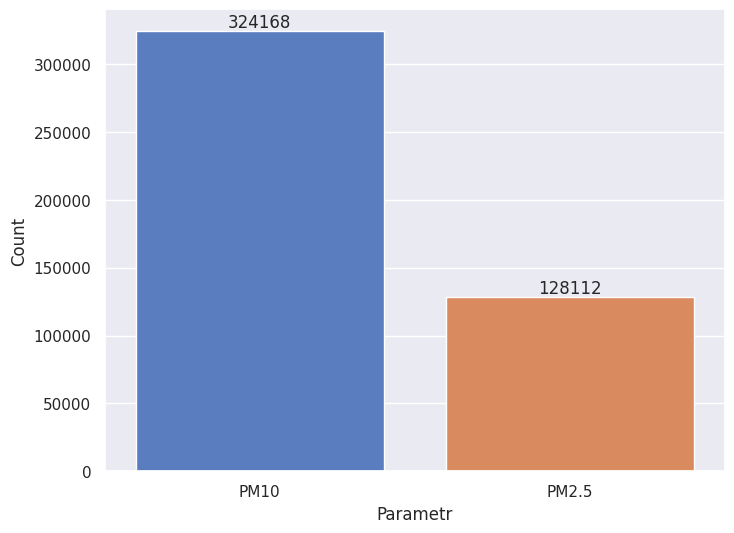

In [24]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_ts, x='Parametr', hue='Parametr')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set(xlabel='Parametr', ylabel='Count')
plt.show()

###Informacje zmienna Parametr
* zamienione zostały błędnie wprowadzone nazwy parametrów (32 błędy)
* w zbiorze danych istnieje ponad dwukrotnie więcej pomiarów wartości PM10 niż PM2.5 (324168 obserwacji PM10 oraz 128112 obserwacji PM2.5)


##<a name='4.3'></a> 4.3 Zmienna Wartosc

###<a name='4.3.1'></a> 4.3.1 Wartości ujemne

In [25]:
# Sprawdzenie wartości ujemnych
df_ts[df_ts['Wartosc'] < 0]

,Data,Godzina,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo
DateTime,,,,,,,,,
2019-09-12 02:00:00,2019-09-12,2,PM10,-22.6640,50.433493,16.653660,Kłodzko,kłodzki,DOLNOŚLĄSKIE
2019-09-14 13:00:00,2019-09-14,13,PM10,-10.6657,50.592325,16.819786,Ząbkowice Śląskie,ząbkowicki,DOLNOŚLĄSKIE
2019-10-06 08:00:00,2019-10-06,8,PM2.5,-7.7100,52.053811,20.429892,Żyrardów,żyrardowski,MAZOWIECKIE
2019-10-07 17:00:00,2019-10-07,17,PM2.5,-14.0000,51.775411,19.450900,Łódź,Łódź,ŁÓDZKIE
2019-10-08 17:00:00,2019-10-08,17,PM10,-17.4172,50.018253,20.992578,Tarnów,Tarnów,MAŁOPOLSKIE
...,...,...,...,...,...,...,...,...,...
2020-02-07 13:00:00,2020-02-07,13,PM10,-2.1796,50.876983,18.416878,Olesno,oleski,OPOLSKIE
2020-02-08 15:00:00,2020-02-08,15,PM2.5,-19.6331,50.069308,20.053492,Kraków,Kraków,MAŁOPOLSKIE
2020-02-08 20:00:00,2020-02-08,20,PM10,-73.7856,50.098508,20.018269,Kraków,Kraków,MAŁOPOLSKIE


Zamienimy 132 wartości ujemne na wartości `NaN` by wspólnie z pozostałymi brakującymi danymi zająć się nimi jednocześnie.

In [26]:
# Zamiana wartości ujemnych na NaN
df_ts.loc[df_ts['Wartosc'] < 0, 'Wartosc']  = np.nan

###<a name='4.3.2'></a> 4.3.2 Wartości odstające

W zbiorze istnieje wiele wartości odstających, które wykraczają bardzo znacząco ponad jakiekolwiek normy dotyczące stężenia pyłu zawieszonego w powietrzu. Warto jednak odnotować, że wartości zbliżone do tych maksymalnych w zbiorze były odnotowane w historii pomiarów. W Polsce w okresach zimowych, wartości potrafią sięgać wartościom 400/500 oraz w innych rejonach świata jak Chiny gdzie warunki sprzyjają wysokiemu stężeniu pyłu zawieszonego mogą osiągać wartości bliskie 800/900 mikrogramów na metr sześcienny dla wartości PM10.

Takie wartości w naszym zbiorze w Polsce mogą jednak wynikać z błędu urządzenia pomiarowego lub złej jednostki. Korzystając z modeli szeregów czasowych przyjrzymy się tym wartosciom oraz uzupełnimy dane średnią z nabardziej zbliżonymi wartościami, które występowały pomiędzy odnotowanymi wartościami.

WHO ustaliło norme średniego, dobowego stężenia na:
  * PM 2.5 - **25 mikrogramów** na metr sześcienny
  * PM10 - **50 mikrogramów** na metr sześcienny

In [27]:
# Sprawdzenie wartości powyżej 500 mikrogramów (10x powyżej normy PM10 oraz
# 20x powyżej normy PM2.5)
df_ts[df_ts['Wartosc'] > 500]

,Data,Godzina,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo
DateTime,,,,,,,,,
2019-10-07 21:00:00,2019-10-07,21,PM10,519.131,50.111181,18.516139,Rybnik,Rybnik,ŚLĄSKIE
2019-10-08 00:00:00,2019-10-08,0,PM10,512.454,50.111181,18.516139,Rybnik,Rybnik,ŚLĄSKIE
2019-10-17 02:00:00,2019-10-17,2,PM10,581.502,50.972167,14.941319,Działoszyn,zgorzelecki,DOLNOŚLĄSKIE
2019-10-25 22:00:00,2019-10-25,22,PM10,549.642,50.111181,18.516139,Rybnik,Rybnik,ŚLĄSKIE
2019-11-07 21:00:00,2019-11-07,21,PM10,535.034,50.111181,18.516139,Rybnik,Rybnik,ŚLĄSKIE
2019-11-07 22:00:00,2019-11-07,22,PM10,543.556,50.111181,18.516139,Rybnik,Rybnik,ŚLĄSKIE
2019-11-07 23:00:00,2019-11-07,23,PM10,514.096,50.111181,18.516139,Rybnik,Rybnik,ŚLĄSKIE
2019-11-25 00:00:00,2019-11-25,0,PM2.5,961.468,51.939783,15.518861,Zielona Góra,Zielona Góra,LUBUSKIE
2019-11-29 20:00:00,2019-11-29,20,PM2.5,961.468,51.939783,15.518861,Zielona Góra,Zielona Góra,LUBUSKIE


In [28]:
# Histogram wartości dla parametrów PM10 oraz PM2.5
px.histogram(df_ts, x='Wartosc', nbins=150, log_y=True,
             height=600, width=1000,
             facet_row='Parametr',
             color='Parametr',
             title='Rozkład wartości dla parametrów PM10 oraz PM2.5',
             color_discrete_sequence=px.colors.qualitative.G10)

Output hidden; open in https://colab.research.google.com to view.

Na histogramach możemy zauważyć, że wartości PM10 są bardziej rozciągnięte na wykresie i sięgają większych wartości niż wartości PM2.5 co jest zgodne ze specyfikacją tych pyłków. Da się zauważyć jednak na pierwszy rzut oka, że dla obu parametrów w naszym zbiorze danych znajdują się wartości odstające.

In [29]:
print(f"Średnia wartość dla PM10 wynosi {(df_ts[df_ts['Parametr'] == 'PM10']['Wartosc'].mean()):.2f}")

Średnia wartość dla PM10 wynosi 31.01


In [30]:
print(f"Przedział wartości dla PM10 to: [{(df_ts[df_ts['Parametr'] == 'PM10']['Wartosc'].min()):.2f}, {(df_ts[df_ts['Parametr'] == 'PM10']['Wartosc'].max()):.2f}]")

Przedział wartości dla PM10 to: [0.00, 866.09]


In [31]:
print(f"Średnia wartość dla PM2.4 wynosi {(df_ts[df_ts['Parametr'] == 'PM2.5']['Wartosc'].mean()):.2f}")

Średnia wartość dla PM2.4 wynosi 24.06


In [32]:
print(f"Przedział wartości dla PM2.5 to: [{(df_ts[df_ts['Parametr'] == 'PM2.5']['Wartosc'].min()):.2f}, {(df_ts[df_ts['Parametr'] == 'PM2.5']['Wartosc'].max()):.2f}]")

Przedział wartości dla PM2.5 to: [0.00, 961.47]


#### Weryfikacja wartości odstających dla parametrów PM10 oraz PM2.5 za pomocą IQR

In [33]:
# Stworzenie oddzielnych ramek danych dla parametru PM10 oraz PM2.5
df_PM10 = df_ts.copy()[df_ts["Parametr"] == 'PM10']
df_PM2_5 = df_ts.copy()[df_ts["Parametr"] == 'PM2.5']

In [34]:
# Obliczenie IQR dla wartości PM10 oraz PM2.5

Q1_PM10 = df_PM10['Wartosc'].quantile(0.25)
Q3_PM10 = df_PM10['Wartosc'].quantile(0.75)

Q1_PM2_5 = df_PM2_5['Wartosc'].quantile(0.25)
Q3_PM2_5 = df_PM2_5['Wartosc'].quantile(0.75)


IQR_PM10 = Q3_PM10 - Q1_PM10
IQR_PM2_5 = Q3_PM2_5 - Q1_PM2_5

lower_bound_PM10 = Q1_PM10 - 1.5 * IQR_PM10
upper_bound_PM10 = Q3_PM10 + 1.5 * IQR_PM10

lower_bound_PM2_5 = Q1_PM2_5 - 1.5 * IQR_PM2_5
upper_bound_PM2_5 = Q3_PM2_5 + 1.5 * IQR_PM2_5

In [35]:
# Wartości odstające PM10 metodą IQR
fig = px.scatter(df_PM10, x=df_PM10.index, y='Wartosc', title='Wartości odstające dla parametru PM10 (IQR)')

fig.add_hline(y=lower_bound_PM10, line_dash="dot", line_color="red", annotation_text="Dolny próg",)
fig.add_hline(y=upper_bound_PM10, line_dash="dot", line_color="red", annotation_text="Górny próg")

fig.add_scatter(x=df_PM10[df_PM10['Wartosc'] < lower_bound_PM10].index, y=df_PM10[df_PM10['Wartosc'] < lower_bound_PM10]['Wartosc'],
                mode='markers', marker=dict(size=10, color="red"), name="Wartości odstające")
fig.add_scatter(x=df_PM10[df_PM10['Wartosc'] > upper_bound_PM10].index, y=df_PM10[df_PM10['Wartosc'] > upper_bound_PM10]['Wartosc'],
                mode='markers', marker=dict(size=10, color="red"), name="Wartości odstające")

fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [36]:
# Wartości odstające PM2.5 metodą IQR
fig = px.scatter(df_PM2_5, x=df_PM2_5.index, y='Wartosc', title='Wartości odstające dla parametru PM2.5 (IQR)')

fig.add_hline(y=lower_bound_PM2_5, line_dash="dot", line_color="red", annotation_text="Dolny próg",)
fig.add_hline(y=upper_bound_PM2_5, line_dash="dot", line_color="red", annotation_text="Górny próg")

fig.add_scatter(x=df_PM2_5[df_PM2_5['Wartosc'] < lower_bound_PM2_5].index, y=df_PM2_5[df_PM2_5['Wartosc'] < lower_bound_PM2_5]['Wartosc'],
                mode='markers', marker=dict(size=10, color="red"), name="Wartości odstające")
fig.add_scatter(x=df_PM2_5[df_PM2_5['Wartosc'] > upper_bound_PM2_5].index, y=df_PM2_5[df_PM2_5['Wartosc'] > upper_bound_PM2_5]['Wartosc'],
                mode='markers', marker=dict(size=10, color="red"), name="Wartości odstające")

fig.show()

Output hidden; open in https://colab.research.google.com to view.

Spróbujmy wyznaczyć IQR dla każdego miasta i parametru oddzielnie.

In [37]:
def identify_outliers_iqr(group):
    Q1 = group['Wartosc'].quantile(0.25)
    Q3 = group['Wartosc'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = (group['Wartosc'] < (Q1 - 1.5 * IQR)) | (group['Wartosc'] > (Q3 + 1.5 * IQR))
    return group[outliers]

# Zastosowanie funkcji identify_outliers_iqr dla każdego miasta i parametru
outliers = df_ts.groupby(['Miasto', 'Parametr']).apply(identify_outliers_iqr)

# Wyświetlenie wartości odstających
outliers.sort_values('Wartosc')

Data  Godzina Parametr  \
Miasto       Parametr DateTime                                           
Ustroń       PM10     2019-11-22 14:00:00 2019-11-22       14     PM10   
                      2020-01-22 21:00:00 2020-01-22       21     PM10   
                      2019-10-24 13:00:00 2019-10-24       13     PM10   
                      2019-10-25 16:00:00 2019-10-25       16     PM10   
                      2020-01-19 07:00:00 2020-01-19        7     PM10   
...                                              ...      ...      ...   
Grudziądz    PM10     2020-02-04 12:00:00 2020-02-04       12     PM10   
Zielona Góra PM2.5    2019-12-02 20:00:00 2019-12-02       20    PM2.5   
                      2019-11-29 20:00:00 2019-11-29       20    PM2.5   
                      2019-12-03 12:00:00 2019-12-03       12    PM2.5   
                      2019-11-25 00:00:00 2019-11-25        0    PM2.5   

                                            Wartosc    SzerGeo    DlugGeo  \
Miasto       Parametr DateTime                                              
Ustroń       PM10     2019-11-22 14:00:00   33.2959  49.719731  18.826722   
                      2020-01-22 21:00:00   33.3093  49.719731  18.826722   
                      2019-10-24 13:00:00   33.3707  49.719731  18.826722   
                      2019-10-25 16:00:00   33.3790  49.719731  18.826722   
                      2020-01-19 07:00:00   33.4811  49.719731  18.826722   
...                                             ...        ...        ...   
Grudziądz    PM10     2020-02-04 12:00:00  866.0900  53.493550  18.762139   
Zielona Góra PM2.5    2019-12-02 20:00:00  961.4680  51.939783  15.518861   
                      2019-11-29 20:00:00  961.4680  51.939783  15.518861   
                      2019-12-03 12:00:00  961.4680  51.939783  15.518861   
                      2019-11-25 00:00:00  961.4680  51.939783  15.518861   

                                                 Miasto        Powiat  \
Miasto       Parametr DateTime                                          
Ustroń       PM10     2019-11-22 14:00:00        Ustroń    cieszyński   
                      2020-01-22 21:00:00        Ustroń    cieszyński   
                      2019-10-24 13:00:00        Ustroń    cieszyński   
                      2019-10-25 16:00:00        Ustroń    cieszyński   
                      2020-01-19 07:00:00        Ustroń    cieszyński   
...                                                 ...           ...   
Grudziądz    PM10     2020-02-04 12:00:00     Grudziądz     Grudziądz   
Zielona Góra PM2.5    2019-12-02 20:00:00  Zielona Góra  Zielona Góra   
                      2019-11-29 20:00:00  Zielona Góra  Zielona Góra   
                      2019-12-03 12:00:00  Zielona Góra  Zielona Góra   
                      2019-11-25 00:00:00  Zielona Góra  Zielona Góra   

                                                  Wojewodztwo  
Miasto       Parametr DateTime                                 
Ustroń       PM10     2019-11-22 14:00:00             ŚLĄSKIE  
                      2020-01-22 21:00:00             ŚLĄSKIE  
                      2019-10-24 13:00:00             ŚLĄSKIE  
                      2019-10-25 16:00:00             ŚLĄSKIE  
                      2020-01-19 07:00:00             ŚLĄSKIE  
...                                                       ...  
Grudziądz    PM10     2020-02-04 12:00:00  KUJAWSKO-POMORSKIE  
Zielona Góra PM2.5    2019-12-02 20:00:00            LUBUSKIE  
                      2019-11-29 20:00:00            LUBUSKIE  
                      2019-12-03 12:00:00            LUBUSKIE  
                      2019-11-25 00:00:00            LUBUSKIE  

[20478 rows x 9 columns]

Wartość PM10 z zaznaczonymi wartościami odstającymi przy pomocy IQR dla każdego miasta

In [38]:
fig = make_subplots(rows=19, cols=5, subplot_titles=np.sort(df_PM10['Miasto'].unique()))
fig.update_layout(width=2000, height=4000)

# Iteracja po unikalnych wartościach Miasto
for i, miasto in enumerate(np.sort(df_PM10['Miasto'].unique()), 1):
    row = ((i - 1) // 5) + 1
    col = i if i <= 5 else i % 5 if i % 5 != 0 else 5

    # Obliczanie kwantyli dla miasta
    Q1 = df_PM10[df_PM10['Miasto'] == miasto]['Wartosc'].quantile(0.25)
    Q3 = df_PM10[df_PM10['Miasto'] == miasto]['Wartosc'].quantile(0.75)
    IQR = Q3 - Q1

    # Dodawanie wykresu do podwykresu
    fig.add_trace(go.Scatter(x=df_PM10[df_PM10['Miasto'] == miasto].index,
                             y=df_PM10[df_PM10['Miasto'] == miasto]['Wartosc'],
                             mode='lines',
                             name=miasto),
                  row=row, col=col)

    # Zaznaczanie punktów odstających
    outliers = df_PM10[(df_PM10['Miasto'] == miasto) &
                              ((df_PM10['Wartosc'] > Q3 + 1.5 * IQR) |
                               (df_PM10['Wartosc'] < Q1 - 1.5 * IQR))]
    fig.add_trace(go.Scatter(x=outliers.index,
                             y=outliers['Wartosc'],
                             mode='markers',
                             marker=dict(color='red', size=6, symbol='circle-open'),
                             name=f'{miasto} (outliers)'),
                  row=row, col=col)

# Ustawienie tytułu oraz wyświetlenie wykresu
fig.update_layout(title_text="Wartości PM10 dla różnych miast z zaznaczeniem wartości odstających przy pomocy IQR", showlegend=False)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Wartość PM2.5 z zaznaczonymi wartościami odstającymi przy pomocy IQR dla każdego miasta

In [39]:
fig = make_subplots(rows=19, cols=2, subplot_titles=np.sort(df_PM2_5['Miasto'].unique()))
fig.update_layout(width=2000, height=4000)

# Iteracja po unikalnych wartościach Miasto
for i, miasto in enumerate(np.sort(df_PM2_5['Miasto'].unique()), 1):
    row = ((i - 1) // 2) + 1
    col = i if i <= 2 else i % 2 if i % 2 != 0 else 2

    # Obliczanie kwantyli dla miasta
    Q1 = df_PM2_5[df_PM2_5['Miasto'] == miasto]['Wartosc'].quantile(0.25)
    Q3 = df_PM2_5[df_PM2_5['Miasto'] == miasto]['Wartosc'].quantile(0.75)
    IQR = Q3 - Q1

    # Dodawanie wykresu do podwykresu
    fig.add_trace(go.Scatter(x=df_PM2_5[df_PM2_5['Miasto'] == miasto].index,
                             y=df_PM2_5[df_PM2_5['Miasto'] == miasto]['Wartosc'],
                             mode='lines',
                             name=miasto),
                  row=row, col=col)

    # Zaznaczanie punktów odstających
    outliers = df_PM2_5[(df_PM2_5['Miasto'] == miasto) &
                              ((df_PM2_5['Wartosc'] > Q3 + 1.5 * IQR) |
                               (df_PM2_5['Wartosc'] < Q1 - 1.5 * IQR))]
    fig.add_trace(go.Scatter(x=outliers.index,
                             y=outliers['Wartosc'],
                             mode='markers',
                             marker=dict(color='red', size=6, symbol='circle-open'),
                             name=f'{miasto} (outliers)'),
                  row=row, col=col)

# Ustawienie tytułu oraz wyświetlenie wykresu
fig.update_layout(title_text="Wartości PM2.5 dla różnych miast z zaznaczeniem wartości odstających przy pomocy IQR", showlegend=False)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Jak widzimy na wykresie za pomocą IQR, otrzymujemy bardzo dużą ilość wartości odstających, ze względu, że stanowcza ilość danych znajduję się blisko średniej. Liczba wartości wychodząca poza zakres IQR to ponad 20 tysięcy obserwacji. Dla Parametru PM10 znaleziono o wiele więcej wartosci odstających w porównaniu z parametrem PM2.5. Dla Parametru PM2.5 jednak odnotowano stanowczo odstające od reszty wartości, które możemy z całą pewnością uznać za błędne patrząc na specyfikację parametru PM2.5 oraz na dni/godziny poprzedzające te 4 obserwacje. Warto by było przeprowadzić analizę dla każdego z miast i parametru by zobaczyć jak te wartości wyglądają na przestrzeni czasu. Zajmiemy się jednak najpierw innymi metodami do weryfikacji oraz poradzenia sobie z wartościami odstającymi.

#### Weryfikacja wartości odstających dla parametrów PM10 oraz PM2.5 za pomocą z-score

Interpretacja wartości z-score:

* Wartości z-score powyżej pewnego progu (np. 2 lub 3) często są uznawane za wartości odstające.
* Wartości z-score bliskie 0 są bliskie średniej.
* Wartości z-score bliskie 1, 2 lub 3 wskazują na obserwacje, które są odpowiednio 1, 2 lub 3 odchylenia standardowe od średniej

In [40]:
from scipy.stats import zscore

# Obliczenie średniej i odchylenia standardowego dla każdej grupy 'Miasto' i 'Parametr'
grouped_stats = df_ts.groupby(['Miasto', 'Parametr'])['Wartosc'].agg(['mean', 'std'])

# Dołączenie średniej i odchylenia standardowego do oryginalnego DataFrame
df_zscore = df_ts.merge(grouped_stats, on=['Miasto', 'Parametr'],  suffixes=('', '_mean_std'))

# Obliczenie z-score
df_zscore['Z_score'] = (df_zscore['Wartosc'] - df_zscore['mean']) / df_zscore['std']

# Znalezienie wartości odstających
outliers_zscore = df_zscore[(df_zscore['Z_score'].abs() > 3)]

In [41]:
# Połaczenie kolumn Data oraz Godzina i ustawienie nowe kolumny jako index
df_ts_zscore = df_zscore.copy()
df_ts_zscore['DateTime'] = pd.to_datetime(df_zscore['Data'].dt.strftime('%Y-%m-%d') + ' ' + df_zscore['Godzina'].astype(str) + ':00:00')
df_ts_zscore = df_ts_zscore.set_index('DateTime').sort_index().sort_values(['Miasto', 'Parametr'])
df_ts_zscore = df_ts_zscore.drop(['Data', 'Godzina'], axis=1)

In [42]:
# Wyznaczenie wartości wykraczających poza 3 odchylenia standardowe
outliers_zscore = df_ts_zscore[(df_ts_zscore['Z_score'].abs() > 3)]
outliers_zscore

,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo,mean,std,Z_score
DateTime,,,,,,,,,,
2019-11-07 15:00:00,PM10,62.090,53.859528,23.000750,Augustów,augustowski,PODLASKIE,17.944324,12.369690,3.568859
2019-11-07 16:00:00,PM10,66.900,53.859528,23.000750,Augustów,augustowski,PODLASKIE,17.944324,12.369690,3.957712
2019-11-07 17:00:00,PM10,76.610,53.859528,23.000750,Augustów,augustowski,PODLASKIE,17.944324,12.369690,4.742696
2019-11-07 18:00:00,PM10,88.040,53.859528,23.000750,Augustów,augustowski,PODLASKIE,17.944324,12.369690,5.666729
2019-11-07 19:00:00,PM10,85.640,53.859528,23.000750,Augustów,augustowski,PODLASKIE,17.944324,12.369690,5.472706
...,...,...,...,...,...,...,...,...,...,...
2020-01-26 20:00:00,PM10,248.570,49.671602,19.234446,Żywiec,żywiecki,ŚLĄSKIE,44.639177,47.665721,4.278354
2020-01-26 21:00:00,PM10,190.779,49.671602,19.234446,Żywiec,żywiecki,ŚLĄSKIE,44.639177,47.665721,3.065931
2020-01-26 22:00:00,PM10,212.598,49.671602,19.234446,Żywiec,żywiecki,ŚLĄSKIE,44.639177,47.665721,3.523682


Przy użyciu metody z-score dostajemy 7282 wartości odstających, które są o  bardziej prawidłową obserwacją w tym przypadku i wyznaczyć wartości, które różnią się znacząco od innych. Sprawdźmy jak wyglądają one na wykresach poszczególnych miast.

In [43]:
# Stworzenie oddzielnych ramek danych dla parametru PM10 oraz PM2.5
df_zscore_PM10 = df_ts_zscore[df_ts_zscore['Parametr'] == 'PM10'].copy()
df_zscore_PM2_5 = df_ts_zscore[df_ts_zscore['Parametr'] == 'PM2.5'].copy()

#### Przebieg wartości PM10 w czasie dla każdego z miast z zaznaczeniem wartości odstajacych przy użyciu z-score

In [44]:
# Liczba miast dla parametru PM10
len(df_zscore_PM10['Miasto'].unique())

95

In [45]:
# Tworzenie podwykresów
fig = make_subplots(rows=19, cols=5, subplot_titles=np.sort(df_zscore_PM10['Miasto'].unique()))

fig.update_layout(width=2000, height=4000)

# Iteracja po unikalnych wartościach Miasto
for i, miasto in enumerate(np.sort(df_zscore_PM10['Miasto'].unique()), 1):
    row = ((i - 1) // 5) + 1
    col = i if i <= 5 else i % 5 if i % 5 != 0 else 5

    # Dodawanie wykresu do podwykresu
    fig.add_trace(go.Scatter(x=df_zscore_PM10[df_zscore_PM10['Miasto'] == miasto].index,
                             y=df_zscore_PM10[df_zscore_PM10['Miasto'] == miasto]['Wartosc'],
                             mode='lines',
                             name=miasto),
                  row=row, col=col)

    # Zaznaczanie punktów, gdzie Z_score > 3
    z_score_above_3 = df_zscore_PM10[(df_zscore_PM10['Miasto'] == miasto) & (df_zscore_PM10['Z_score'].abs() > 3)]
    fig.add_trace(go.Scatter(x=z_score_above_3.index,
                             y=z_score_above_3['Wartosc'],
                             mode='markers',
                             marker=dict(color='red', size=6, symbol='circle-open'),
                             name=f'{miasto} (Z_score > 3)'),
                  row=row, col=col)

# Ustawienie tytułu oraz wyświetlenie wykresu
fig.update_layout(title_text="Wartości PM10 dla różnych miast z zaznaczeniem wartości odstających przy pomocy z-score", showlegend=False)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

#### Przebieg wartości PM2.5 w czasie dla każdego z miast z zaznaczeniem wartości odstajacych przy użyciu z-score

In [46]:
# Liczba miast dla parametru PM2.5
len(df_zscore_PM2_5['Miasto'].unique())

38

In [47]:
# Tworzenie podwykresów
fig = make_subplots(rows=19, cols=2, subplot_titles=np.sort(df_zscore_PM2_5['Miasto'].unique()))

fig.update_layout(width=2000, height=4000)

# Iteracja po unikalnych wartościach Miasto
for i, miasto in enumerate(np.sort(df_zscore_PM2_5['Miasto'].unique()), 1):
    row = ((i - 1) // 2) + 1
    col = i if i <= 2 else i % 2 if i % 2 != 0 else 2

    # Dodawanie wykresu do podwykresu
    fig.add_trace(go.Scatter(x=df_zscore_PM2_5[df_zscore_PM2_5['Miasto'] == miasto].index,
                             y=df_zscore_PM2_5[df_zscore_PM2_5['Miasto'] == miasto]['Wartosc'],
                             mode='lines',
                             name=miasto),
                  row=row, col=col)

    # Zaznaczanie punktów, gdzie Z_score > 3
    z_score_above_3 = df_zscore_PM2_5[(df_zscore_PM2_5['Miasto'] == miasto) & (df_zscore_PM2_5['Z_score'].abs() > 3)]
    fig.add_trace(go.Scatter(x=z_score_above_3.index,
                             y=z_score_above_3['Wartosc'],
                             mode='markers',
                             marker=dict(color='red', size=6, symbol='circle-open'),
                             name=f' (Z_score > 3)'),
                  row=row, col=col)

# Ustawienie tytułu oraz wyświetlenie wykresu
fig.update_layout(title_text="Wartości PM2.5 dla różnych miast z zaznaczeniem wartości odstających przy pomocy z-score", showlegend=False)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Ze wzgledu na specyfikację naszego problemu nie powinniśmy pozbywać się również tych wartości, które znalezione zostały za pomocą metody z-score. Wartości sięgające granic w wielu przypadkach są rzeczywistymi danymi prezntującymi dane godziny w ciągu dnia gdy poziom pyłków był największy.

Skupimy się dlatego na wartościach, które wyglądaja na nieprawidłowe i zawierają dane (takie jak na przykład wartości zawuażone na wykresie dla Zielonej Góry), które z godziny na godzinę zawierają bardzo znaczący przeskok i wyglądaja na źle wprowadzone lub błędnie zbadane.

#### Weryfikacja wartości przekraczających 10x normy PM10 oraz 10x normy PM2.5

* PM 2.5 - 25 mikrogramów na metr sześcienny
* PM10 - 50 mikrogramów na metr sześcienny

In [48]:
df = df_ts.reset_index()

In [49]:
# Wartości powyżej 10 krotnej normy
df[((df['Parametr'] == 'PM2.5') & (df['Wartosc'] > 10 * 25)) | ((df['Parametr'] == 'PM10') & (df['Wartosc'] > 10 * 50))]

,DateTime,Data,Godzina,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo
20555,2019-10-07 21:00:00,2019-10-07,21,PM10,519.131,50.111181,18.516139,Rybnik,Rybnik,ŚLĄSKIE
20970,2019-10-08 00:00:00,2019-10-08,0,PM10,512.454,50.111181,18.516139,Rybnik,Rybnik,ŚLĄSKIE
54961,2019-10-17 02:00:00,2019-10-17,2,PM10,581.502,50.972167,14.941319,Działoszyn,zgorzelecki,DOLNOŚLĄSKIE
87921,2019-10-25 22:00:00,2019-10-25,22,PM10,549.642,50.111181,18.516139,Rybnik,Rybnik,ŚLĄSKIE
106324,2019-10-31 20:00:00,2019-10-31,20,PM2.5,254.300,50.429014,21.277367,Połaniec,staszowski,ŚWIĘTOKRZYSKIE
106416,2019-10-31 21:00:00,2019-10-31,21,PM2.5,255.000,51.856692,19.421231,Zgierz,zgierski,ŁÓDZKIE
106920,2019-11-01 00:00:00,2019-11-01,0,PM2.5,260.500,52.658467,19.059314,Włocławek,Włocławek,KUJAWSKO-POMORSKIE
132695,2019-11-07 21:00:00,2019-11-07,21,PM10,535.034,50.111181,18.516139,Rybnik,Rybnik,ŚLĄSKIE
132814,2019-11-07 22:00:00,2019-11-07,22,PM10,543.556,50.111181,18.516139,Rybnik,Rybnik,ŚLĄSKIE
132971,2019-11-07 23:00:00,2019-11-07,23,PM10,514.096,50.111181,18.516139,Rybnik,Rybnik,ŚLĄSKIE


In [50]:
# Zamiana wartości odbiegających od normy na wartości puste
conditions = ((df['Parametr'] == 'PM2.5') & (df['Wartosc'] > 10 * 25)) | ((df['Parametr'] == 'PM10') & (df['Wartosc'] > 10 * 50))

indices_to_replace = df[conditions].index

df.loc[indices_to_replace, 'Wartosc'] = np.nan

In [51]:
df_ts = df.copy()

In [52]:
# Histogram wartości dla parametrów PM10 oraz PM2.5
px.histogram(df_ts, x='Wartosc', nbins=150, log_y=True,
             height=600, width=1000,
             facet_row='Parametr',
             color='Parametr',
             title='Rozkład wartości dla parametrów PM10 oraz PM2.5 po usunięciu wartości odstających',
             color_discrete_sequence=px.colors.qualitative.G10)

Output hidden; open in https://colab.research.google.com to view.

###<a name='4.3.3'></a> 4.3.3 Kilka wartości dla tej samej daty i miasta

W zbiorze danych dla jednego miasta o jednej porze odnotowane jest czasami kilka pomiarów. Zamienimy te wartości na jedną wartość średnią z tych pomiarów i przeanalizujmy i porównajmy te wartości ze sobą.

In [53]:
df_ts.head()

,DateTime,Data,Godzina,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo
0,2019-09-02,2019-09-02,0,PM10,27.8500,52.793122,18.241044,Inowrocław,inowrocławski,KUJAWSKO-POMORSKIE
1,2019-09-02,2019-09-02,0,PM10,6.3834,50.592325,16.819786,Ząbkowice Śląskie,ząbkowicki,DOLNOŚLĄSKIE
2,2019-09-02,2019-09-02,0,PM10,37.4782,53.134083,17.995708,Bydgoszcz,Bydgoszcz,KUJAWSKO-POMORSKIE
3,2019-09-02,2019-09-02,0,PM10,35.3000,53.121764,17.987906,Bydgoszcz,Bydgoszcz,KUJAWSKO-POMORSKIE
4,2019-09-02,2019-09-02,0,PM10,23.2100,53.012261,18.606203,Toruń,Toruń,KUJAWSKO-POMORSKIE


In [54]:
# Stworzenie kolumny wartosc_srednia dla wartosci mierzonych o tym samym czasie dla tego samego miasta
df_ts['Wartosc_srednia'] = df.groupby(['Data', 'Godzina', 'Parametr', 'Miasto'])['Wartosc'].transform('mean')

In [55]:
# Weryfikacja konkretnych dni i wyliczonej wartości średniej
df_ts[(df_ts['DateTime'] == '2020-02-09 18:00:00') & (df_ts['Miasto'] == 'Warszawa')]

,DateTime,Data,Godzina,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo,Wartosc_srednia
452249,2020-02-09 18:00:00,2020-02-09,18,PM10,52.73,52.219298,21.004724,Warszawa,Warszawa,MAZOWIECKIE,40.64
452250,2020-02-09 18:00:00,2020-02-09,18,PM10,28.55,52.160772,21.033819,Warszawa,Warszawa,MAZOWIECKIE,40.64
452277,2020-02-09 18:00:00,2020-02-09,18,PM2.5,26.72,52.160772,21.033819,Warszawa,Warszawa,MAZOWIECKIE,33.00
452278,2020-02-09 18:00:00,2020-02-09,18,PM2.5,39.28,52.219298,21.004724,Warszawa,Warszawa,MAZOWIECKIE,33.00


In [56]:
# Wartości bez zduplikowanych dat
test = df_ts[~df_ts.duplicated(subset=['DateTime', 'Parametr', 'Wartosc_srednia', 'Miasto', 'Powiat', 'Wojewodztwo'])]

In [57]:
# Kształt ramki ze wszystkimi wartościami
df_ts.shape

(452280, 11)

In [58]:
# Kształt ramki bez zduplikowanych dat st dla tych samych miast i parametrów
test.shape

(371173, 11)

#### Weryfkacja Wartości średniej dla miasta Warszawa

In [59]:
# Weryfikacja konkretnych dni i wyliczonej wartości średniej
df_ts[(df_ts['DateTime'] == '2020-02-09 18:00:00') & (df_ts['Miasto'] == 'Warszawa')]

,DateTime,Data,Godzina,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo,Wartosc_srednia
452249,2020-02-09 18:00:00,2020-02-09,18,PM10,52.73,52.219298,21.004724,Warszawa,Warszawa,MAZOWIECKIE,40.64
452250,2020-02-09 18:00:00,2020-02-09,18,PM10,28.55,52.160772,21.033819,Warszawa,Warszawa,MAZOWIECKIE,40.64
452277,2020-02-09 18:00:00,2020-02-09,18,PM2.5,26.72,52.160772,21.033819,Warszawa,Warszawa,MAZOWIECKIE,33.00
452278,2020-02-09 18:00:00,2020-02-09,18,PM2.5,39.28,52.219298,21.004724,Warszawa,Warszawa,MAZOWIECKIE,33.00


In [60]:
test[(test['DateTime'] == '2020-02-09 17:00:00') & (test['Miasto'] == 'Warszawa')]

,DateTime,Data,Godzina,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo,Wartosc_srednia
452041,2020-02-09 17:00:00,2020-02-09,17,PM2.5,29.12,52.285073,20.933018,Warszawa,Warszawa,MAZOWIECKIE,30.360000
452069,2020-02-09 17:00:00,2020-02-09,17,PM10,30.67,52.285073,20.933018,Warszawa,Warszawa,MAZOWIECKIE,36.993333


Uzyskane wartości średnie dla każdej godziny reprezentują przeciętne stężenia PM10 oraz PM2.5 w całym mieście w tej konkretnej godzinie.
Takie podejście pozwala na uzyskanie bardziej reprezentatywnych wartości stężeń PM10 oraz PM2.5 dla całego miasta dla każdej godziny, biorąc pod uwagę pomiary z różnych punktów pomiarowych. Sprawdźmy jak wyglądają przebiegi tych wartości w czasie.

In [61]:
# Przebieg Wartosci oraz Wartosci średniej dla miasta Warszawa i parametru PM10

fig = go.Figure()

# Dodawanie pierwszego wykresu 'Wartosc'
fig.add_trace(go.Scatter(
    x=test[(test['Miasto'] == 'Warszawa') & (test['Parametr'] == 'PM10')].sort_values('DateTime')['DateTime'],
    y=test[(test['Miasto'] == 'Warszawa') & (test['Parametr'] == 'PM10')]['Wartosc'],
    mode='lines',
    name='Wartosc'
))

# Dodawanie drugiego wykresu 'Wartosc_srednia'
fig.add_trace(go.Scatter(
    x=test[(test['Miasto'] == 'Warszawa') & (test['Parametr'] == 'PM10')].sort_values('DateTime')['DateTime'],
    y=test[(test['Miasto'] == 'Warszawa') & (test['Parametr'] == 'PM10')]['Wartosc_srednia'],
    mode='lines',
    name='Wartosc_srednia',

))

fig.update_layout(title='Porównanie Wartosci oraz Wartosci_sredniej dla parametru PM10 oraz dla miasta Warszawa',
                  xaxis_title='Data',
                  yaxis_title='Wartość')
fig.show()

In [62]:
# Weryfikacja wyliczenia wartości średniej przy jednej wartości pustej
df_ts[(df_ts['DateTime'] == '2020-01-18 05:00:00') & (df_ts['Miasto'] == 'Warszawa')]

,DateTime,Data,Godzina,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo,Wartosc_srednia
369368,2020-01-18 05:00:00,2020-01-18,5,PM10,NaN,52.285073,20.933018,Warszawa,Warszawa,MAZOWIECKIE,43.653333
369369,2020-01-18 05:00:00,2020-01-18,5,PM2.5,44.93,52.285073,20.933018,Warszawa,Warszawa,MAZOWIECKIE,40.940000
369452,2020-01-18 05:00:00,2020-01-18,5,PM10,39.80,52.290864,21.042458,Warszawa,Warszawa,MAZOWIECKIE,43.653333
369454,2020-01-18 05:00:00,2020-01-18,5,PM2.5,34.36,52.160772,21.033819,Warszawa,Warszawa,MAZOWIECKIE,40.940000
369456,2020-01-18 05:00:00,2020-01-18,5,PM10,42.99,52.160772,21.033819,Warszawa,Warszawa,MAZOWIECKIE,43.653333
369458,2020-01-18 05:00:00,2020-01-18,5,PM2.5,46.73,52.219298,21.004724,Warszawa,Warszawa,MAZOWIECKIE,40.940000
369460,2020-01-18 05:00:00,2020-01-18,5,PM10,48.17,52.219298,21.004724,Warszawa,Warszawa,MAZOWIECKIE,43.653333
369467,2020-01-18 05:00:00,2020-01-18,5,PM2.5,37.74,52.290864,21.042458,Warszawa,Warszawa,MAZOWIECKIE,40.940000


#### Weryfkacja Wartości średniej dla miasta Kraków

In [63]:
# Weryfikacja konkretnych dni i wyliczonej wartości średniej
df_ts[(df_ts['DateTime'] == '2019-12-19 10:00:00') & (df_ts['Miasto'] == 'Kraków')]

,DateTime,Data,Godzina,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo,Wartosc_srednia
287502,2019-12-19 10:00:00,2019-12-19,10,PM10,40.7959,50.010575,19.949189,Kraków,Kraków,MAŁOPOLSKIE,70.628257
287505,2019-12-19 10:00:00,2019-12-19,10,PM2.5,34.1951,50.010575,19.949189,Kraków,Kraków,MAŁOPOLSKIE,57.903333
287525,2019-12-19 10:00:00,2019-12-19,10,PM10,45.8643,50.100569,20.122561,Kraków,Kraków,MAŁOPOLSKIE,70.628257
287529,2019-12-19 10:00:00,2019-12-19,10,PM10,75.6250,50.081197,19.895358,Kraków,Kraków,MAŁOPOLSKIE,70.628257
287530,2019-12-19 10:00:00,2019-12-19,10,PM10,55.4048,50.098508,20.018269,Kraków,Kraków,MAŁOPOLSKIE,70.628257
287532,2019-12-19 10:00:00,2019-12-19,10,PM10,80.2035,50.057447,19.946008,Kraków,Kraków,MAŁOPOLSKIE,70.628257
287633,2019-12-19 10:00:00,2019-12-19,10,PM2.5,66.7247,50.069308,20.053492,Kraków,Kraków,MAŁOPOLSKIE,57.903333
287643,2019-12-19 10:00:00,2019-12-19,10,PM2.5,72.7902,50.057678,19.926189,Kraków,Kraków,MAŁOPOLSKIE,57.903333
287645,2019-12-19 10:00:00,2019-12-19,10,PM10,79.6293,50.069308,20.053492,Kraków,Kraków,MAŁOPOLSKIE,70.628257
287648,2019-12-19 10:00:00,2019-12-19,10,PM10,116.8750,50.057678,19.926189,Kraków,Kraków,MAŁOPOLSKIE,70.628257


In [64]:
test[(test['DateTime'] == '2019-12-09 10:00:00') & (test['Miasto'] == 'Kraków')]

,DateTime,Data,Godzina,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo,Wartosc_srednia
250119,2019-12-09 10:00:00,2019-12-09,10,PM2.5,165.195,50.010575,19.949189,Kraków,Kraków,MAŁOPOLSKIE,71.486567
250124,2019-12-09 10:00:00,2019-12-09,10,PM10,24.528,50.057447,19.946008,Kraków,Kraków,MAŁOPOLSKIE,32.691650


In [65]:
# Przebieg Wartosci oraz Wartosci średniej dla miasta Kraków i parametru PM2.5

fig = go.Figure()

# Dodawanie pierwszego wykresu 'Wartosc'
fig.add_trace(go.Scatter(
    x=test[(test['Miasto'] == 'Kraków') & (test['Parametr'] == 'PM2.5')].sort_values('DateTime')['DateTime'],
    y=test[(test['Miasto'] == 'Kraków') & (test['Parametr'] == 'PM2.5')]['Wartosc'],
    mode='lines',
    name='Wartosc'
))

# Dodawanie drugiego wykresu 'Wartosc_srednia'
fig.add_trace(go.Scatter(
    x=test[(test['Miasto'] == 'Kraków') & (test['Parametr'] == 'PM2.5')].sort_values('DateTime')['DateTime'],
    y=test[(test['Miasto'] == 'Kraków') & (test['Parametr'] == 'PM2.5')]['Wartosc_srednia'],
    mode='lines',
    name='Wartosc_srednia'))

fig.update_layout(title='Porównanie Wartosci oraz Wartosci_sredniej dla parametru PM2.5 oraz dla miasta Kraków',
                  xaxis_title='Data',
                  yaxis_title='Wartość')
fig.show()

In [66]:
#Zastąpienie wartości, wartościami średnimi wyliczonymi wczesniej
df_ts['Wartosc'] = df_ts['Wartosc_srednia']
df_ts.drop('Wartosc_srednia', axis=1, inplace=True)
df_ts = df_ts[~df_ts.duplicated(subset=['DateTime', 'Parametr', 'Wartosc', 'Miasto', 'Powiat', 'Wojewodztwo'])]

In [67]:
df_ts.shape

(371173, 10)

###<a name='4.3.4'></a> 4.3.4 Wartości brakujące

W zbiorze znajduje się 391 brakujących wartości dla kolumny `Wartosc`. Wypróbujemy kilka metod uzupełnienia braków do przenalizowania i wyboru najlepszej metody by uzupełnić te braki z największą precyzją.

Zamienimy dla sprawniejszej analizy naszą pierwotną ramkę `df_ts` i pozbędziemy się kolumn `Data` oraz `Godzina` na rzecz indexu `DateTime`.

In [68]:
#Zamiana kolumn Data oraz Godzina na index DateTime
df_ts['DateTime'] = pd.to_datetime(df_ts['Data'].dt.strftime('%Y-%m-%d') + ' ' + df_ts['Godzina'].astype(str) + ':00:00')
df_ts = df_ts.set_index('DateTime').sort_index().sort_values(['Miasto', 'Parametr'])
df_ts = df_ts.drop(['Data', 'Godzina'], axis=1)

In [69]:
df_ts.isnull().sum()

Parametr         0
Wartosc        391
SzerGeo          0
DlugGeo          0
Miasto           0
Powiat           0
Wojewodztwo      0
dtype: int64

In [70]:
df_ts[(df_ts['Miasto'] == 'Kłodzko')].loc['2019-09-03']

,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo
DateTime,,,,,,,
2019-09-03 00:00:00,PM10,9.0768,50.433493,16.65366,Kłodzko,kłodzki,DOLNOŚLĄSKIE
2019-09-03 01:00:00,PM10,10.8786,50.433493,16.65366,Kłodzko,kłodzki,DOLNOŚLĄSKIE
2019-09-03 02:00:00,PM10,10.3166,50.433493,16.65366,Kłodzko,kłodzki,DOLNOŚLĄSKIE
2019-09-03 03:00:00,PM10,10.9948,50.433493,16.65366,Kłodzko,kłodzki,DOLNOŚLĄSKIE
2019-09-03 04:00:00,PM10,8.3736,50.433493,16.65366,Kłodzko,kłodzki,DOLNOŚLĄSKIE
2019-09-03 05:00:00,PM10,8.4179,50.433493,16.65366,Kłodzko,kłodzki,DOLNOŚLĄSKIE
2019-09-03 06:00:00,PM10,8.2551,50.433493,16.65366,Kłodzko,kłodzki,DOLNOŚLĄSKIE
2019-09-03 07:00:00,PM10,5.8249,50.433493,16.65366,Kłodzko,kłodzki,DOLNOŚLĄSKIE
2019-09-03 08:00:00,PM10,2.5421,50.433493,16.65366,Kłodzko,kłodzki,DOLNOŚLĄSKIE


Przyjrzyjmy się jednej z wartości pustych. W dniu 2019-09-03 o godzinie 12 dla miasta Kłodzko w naszym zbiorze widnieje brakująca wartość.

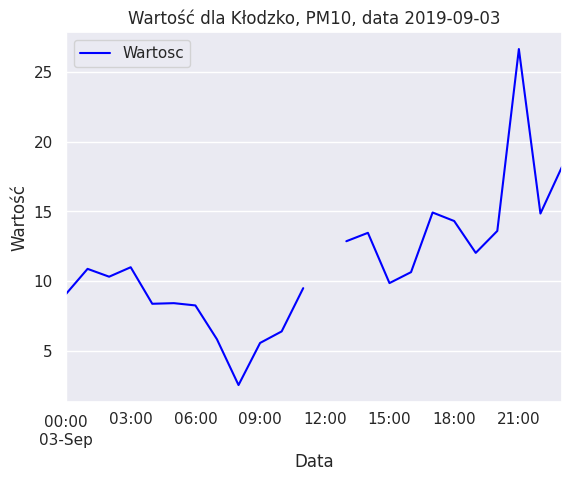

In [71]:
_ = df_ts[(df_ts['Miasto'] == 'Kłodzko')].loc['2019-09-03']['Wartosc'].plot(kind='line', c='blue')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.title('Wartość dla Kłodzko, PM10, data 2019-09-03')
plt.legend()
plt.show()

#### Zbadanie czy występują po sobie kolejno braki wartości (braki które występują 1h po sobie)

In [72]:
# Wykonanie kopii ramki danych
records_with_one_hour_diff = df_ts.reset_index()

In [73]:
# Pogrupowanie obserwacji pustych po miastach i parametrze
records_with_one_hour_diff = records_with_one_hour_diff[records_with_one_hour_diff['Wartosc'].isnull()].groupby(['Miasto', 'Parametr']).apply(lambda x: x).sort_index()

In [74]:
# Sprawdzenie różnicy wystąpień kolejnych pustych wartości
records_with_one_hour_diff['Czas'] = records_with_one_hour_diff['DateTime'].diff()

In [75]:
# Przypisanie wartości, które mają 1h różnicy między obserwacjami
records_with_one_hour_diff = records_with_one_hour_diff[records_with_one_hour_diff['Czas'] == pd.Timedelta(hours=1)]

In [76]:
records_with_one_hour_diff

DateTime Parametr  Wartosc    SzerGeo  \
Miasto  Parametr                                                           
Rybnik  PM10     225377 2019-11-07 22:00:00     PM10      NaN  50.111181   
                 225378 2019-11-07 23:00:00     PM10      NaN  50.111181   
                 226182 2019-12-12 00:00:00     PM10      NaN  50.111181   
                 226792 2020-01-16 22:00:00     PM10      NaN  50.111181   
                 226793 2020-01-16 23:00:00     PM10      NaN  50.111181   
                 226794 2020-01-17 00:00:00     PM10      NaN  50.111181   
                 226795 2020-01-17 01:00:00     PM10      NaN  50.111181   
Wschowa PM2.5    311091 2020-01-02 22:00:00    PM2.5      NaN  51.799722   
Zabrze  PM10     319004 2020-01-16 22:00:00     PM10      NaN  50.316500   
                 319005 2020-01-16 23:00:00     PM10      NaN  50.316500   
                 319006 2020-01-17 00:00:00     PM10      NaN  50.316500   

                           DlugGeo   Miasto     Powiat Wojewodztwo  \
Miasto  Parametr                                                     
Rybnik  PM10     225377  18.516139   Rybnik     Rybnik     ŚLĄSKIE   
                 225378  18.516139   Rybnik     Rybnik     ŚLĄSKIE   
                 226182  18.516139   Rybnik     Rybnik     ŚLĄSKIE   
                 226792  18.516139   Rybnik     Rybnik     ŚLĄSKIE   
                 226793  18.516139   Rybnik     Rybnik     ŚLĄSKIE   
                 226794  18.516139   Rybnik     Rybnik     ŚLĄSKIE   
                 226795  18.516139   Rybnik     Rybnik     ŚLĄSKIE   
Wschowa PM2.5    311091  16.317500  Wschowa  wschowski    LUBUSKIE   
Zabrze  PM10     319004  18.772375   Zabrze     Zabrze     ŚLĄSKIE   
                 319005  18.772375   Zabrze     Zabrze     ŚLĄSKIE   
                 319006  18.772375   Zabrze     Zabrze     ŚLĄSKIE   

                                   Czas  
Miasto  Parametr                         
Rybnik  PM10     225377 0 days 01:00:00  
                 225378 0 days 01:00:00  
                 226182 0 days 01:00:00  
                 226792 0 days 01:00:00  
                 226793 0 days 01:00:00  
                 226794 0 days 01:00:00  
                 226795 0 days 01:00:00  
Wschowa PM2.5    311091 0 days 01:00:00  
Zabrze  PM10     319004 0 days 01:00:00  
                 319005 0 days 01:00:00  
                 319006 0 days 01:00:00

Dla miast, Rybnik, Wschowa, Zabrze brakujące wartości występują z okresem większym niż 1h pod rząd.

#### Weryfikacja liczby braków dla każdego miasta i parametru

In [77]:
df_ts.groupby(['Miasto', 'Parametr']).apply(lambda x: x.isnull().sum())['Wartosc'].sort_values()

Miasto      Parametr
Wschowa     PM10         0
Łódź        PM10         0
Warszawa    PM2.5        0
Kraków      PM2.5        0
Gdańsk      PM10         0
                        ..
Mielec      PM2.5        7
Szczecinek  PM10         7
Ustroń      PM10         8
Piła        PM10         8
Rybnik      PM10        19
Name: Wartosc, Length: 133, dtype: int64

Największa liczba braków w Wartosciach występuje dla Rybnika i parametru PM10 (19 braków). Dla niektórych miast w poszczególnych parametrach nie ma żadnych braków. Spróbujemy zweryfikować na jednym z tych miast i parametrów, które nie mają braków, najlepszą metodę uzupełnienia danych.

#### Interpolacja liniowa

In [78]:
# Tworzymy nową kolumnę by potwierdzić poprawność zastosowania metody
df_ts['interpolacja_liniowa'] = df_ts.groupby(['Miasto', 'Parametr'])['Wartosc'].transform(lambda x: x.interpolate(method='linear'))

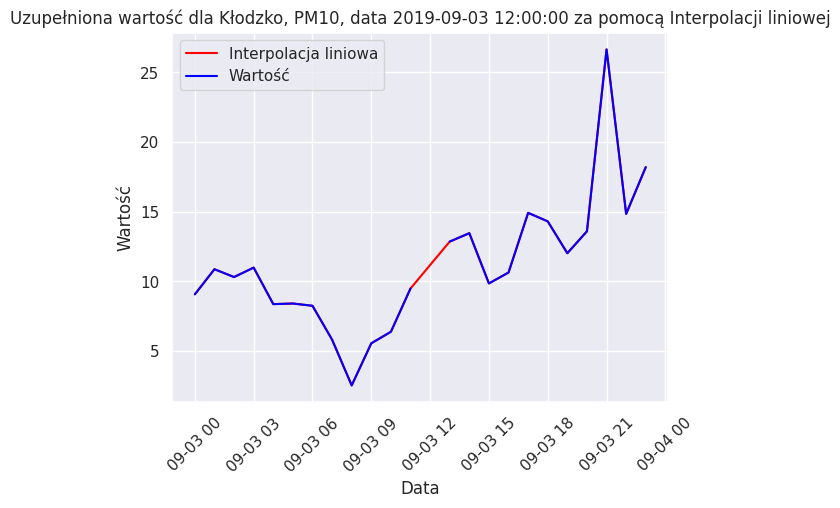

In [79]:
# Wizualizacja uzupełnionej wartości za pomocą interpolacji liniowej
plt.plot(df_ts[(df_ts['Miasto'] == 'Kłodzko')].loc['2019-09-03']['interpolacja_liniowa'], c='red', label='Interpolacja liniowa')
plt.plot(df_ts[(df_ts['Miasto'] == 'Kłodzko')].loc['2019-09-03']['Wartosc'], c='blue', label='Wartość')
plt.xticks(rotation=45)
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.title('Uzupełniona wartość dla Kłodzko, PM10, data 2019-09-03 12:00:00 za pomocą Interpolacji liniowej')
plt.legend()
plt.show()

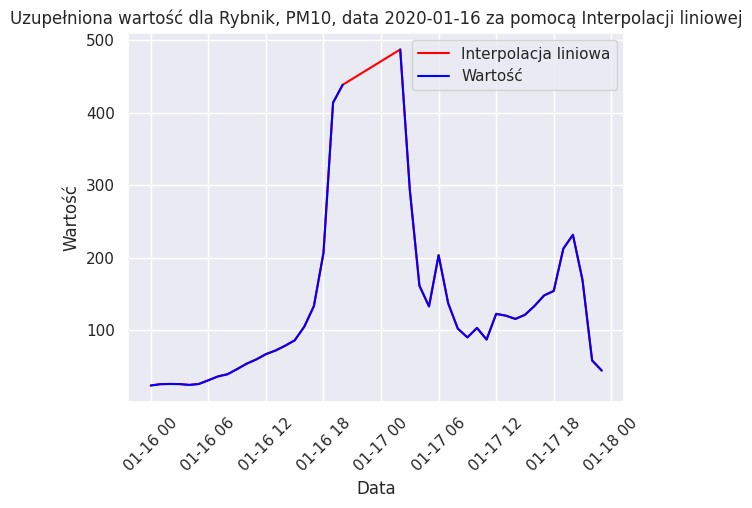

In [80]:
# Wizualizacja uzupełnionej wartości za pomocą interpolacji liniowej dla dwóch dni miasto Rybnik
plt.plot(df_ts[(df_ts['Miasto'] == 'Rybnik')].loc['2020-01-16':'2020-01-17']['interpolacja_liniowa'], c='red', label='Interpolacja liniowa')
plt.plot(df_ts[(df_ts['Miasto'] == 'Rybnik')].loc['2020-01-16':'2020-01-17']['Wartosc'], c='blue', label='Wartość')
plt.xticks(rotation=45)
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.title('Uzupełniona wartość dla Rybnik, PM10, data 2020-01-16 za pomocą Interpolacji liniowej')
plt.legend()
plt.show()

O ile metody inteprolacji moga być przydatne dla braków w przypadku małego przeskoku tak dla większych zakresów dat może okazać się nie w pełni zadowalająca. Spróbujemy przenalizować również inne metody by uzupełnić nasze braki danych.

#### Średnia ruchoma

In [81]:
# PM10 ze średnią ruchomą dla miasta Grudziądz
filtered_data = df_ts[(df_ts['Miasto'] == 'Grudziądz') & (df_ts['Parametr'] == 'PM10')].copy()

filtered_data['Moving_average'] = filtered_data['Wartosc'].rolling(window=3, min_periods=1).mean()

fig = px.line(filtered_data, x=filtered_data.index, y=['Wartosc', 'Moving_average'],
              labels={'value': 'Wartość', 'index': 'Data'},
              title='Średnia ruchoma oraz Wartość PM10 dla miasta Grudziądz',
              color_discrete_map={'Wartosc': 'blue', 'Moving_average': 'orange'})

fig.update_layout(xaxis_tickangle=-45)

fig.show()

In [82]:
filtered_data[filtered_data['Wartosc'].isnull()]

,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo,interpolacja_liniowa,Moving_average
DateTime,,,,,,,,,
2020-02-04 12:00:00,PM10,NaN,53.49355,18.762139,Grudziądz,Grudziądz,KUJAWSKO-POMORSKIE,21.56,16.74


Wykorzystnaie samej średniej ruchomej nie będzie najlepszym rozwiązaniem w tym przypadku ze względu na występowanie sporych wahań i występowanie braków po sobie.

#### Porównanie na rzeczywistych danych różnych metod uzupełnienia brakujących danych

In [83]:
# Wyodrębnienie ramki danych dla miasta Wschowa oraz parametru PM10 (nie ma brakujących wartości w zbiorze)
Wschowa_PM10 = df_ts[(df_ts['Miasto'] == 'Wschowa') & (df_ts['Parametr'] == 'PM10')]

In [84]:
# Zobrazowanie Wartości PM10 dla miasta Wschowa
fig = px.line(Wschowa_PM10,
              x=Wschowa_PM10.index,
              y=Wschowa_PM10['Wartosc'],
              title='Wartość PM10 dla miasta Wschowa')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [85]:
# Dodanie kolumny Wartosc_testowa oraz reset indexu
Wschowa_PM10 = Wschowa_PM10.assign(Wartosc_testowa=Wschowa_PM10['Wartosc'])
Wschowa_PM10.reset_index(inplace=True)

In [86]:
# Losowe wygenerowanie 30 indeksów z zakresu ramki Wschowa_PM10
indeksy = []
for i in random.sample(range(len(Wschowa_PM10['Wartosc'])), k=30):
  indeksy.append(i)

In [87]:
# Wyodrębnienie tylko niezbędnych kolumn
Wschowa_PM10 = Wschowa_PM10[['DateTime', 'Wartosc', 'Wartosc_testowa']]

In [88]:
# Przypisanie wartości pustej losowym indeksom
Wschowa_PM10.loc[indeksy, 'Wartosc_testowa'] = np.nan

In [89]:
# Sprawdzenie ilości brakujących wartości dla Wartosc_testowa
Wschowa_PM10.isnull().sum()

DateTime            0
Wartosc             0
Wartosc_testowa    30
dtype: int64

In [90]:
# Ustawienie indexu DateTime
Wschowa_PM10.set_index('DateTime', inplace=True)

In [91]:
# Przetestowanie 15 różnych metod uzupełnienia danych
Wschowa_PM10 = Wschowa_PM10.assign(RollingMean4=Wschowa_PM10['Wartosc_testowa'].fillna(Wschowa_PM10['Wartosc_testowa'].rolling(4,min_periods=1).mean()))
Wschowa_PM10 = Wschowa_PM10.assign(RollingMedian4=Wschowa_PM10['Wartosc_testowa'].fillna(Wschowa_PM10['Wartosc_testowa'].rolling(4,min_periods=1).median()))
Wschowa_PM10 = Wschowa_PM10.assign(RollingMean6=Wschowa_PM10['Wartosc_testowa'].fillna(Wschowa_PM10['Wartosc_testowa'].rolling(6,min_periods=1).mean()))
Wschowa_PM10 = Wschowa_PM10.assign(RollingMedian6=Wschowa_PM10['Wartosc_testowa'].fillna(Wschowa_PM10['Wartosc_testowa'].rolling(6,min_periods=1).median()))
Wschowa_PM10 = Wschowa_PM10.assign(InterpolateLinear=Wschowa_PM10['Wartosc_testowa'].interpolate(method='linear'))
Wschowa_PM10 = Wschowa_PM10.assign(InterpolateTime=Wschowa_PM10['Wartosc_testowa'].interpolate(method='time'))
Wschowa_PM10 = Wschowa_PM10.assign(InterpolateQuadratic=Wschowa_PM10['Wartosc_testowa'].interpolate(method='quadratic'))
Wschowa_PM10 = Wschowa_PM10.assign(InterpolateCubic=Wschowa_PM10['Wartosc_testowa'].interpolate(method='cubic'))
Wschowa_PM10 = Wschowa_PM10.assign(InterpolateSLinear=Wschowa_PM10['Wartosc_testowa'].interpolate(method='slinear'))
Wschowa_PM10 = Wschowa_PM10.assign(InterpolateAkima=Wschowa_PM10['Wartosc_testowa'].interpolate(method='akima'))
Wschowa_PM10 = Wschowa_PM10.assign(InterpolatePoly5=Wschowa_PM10['Wartosc_testowa'].interpolate(method='polynomial', order=5))
Wschowa_PM10 = Wschowa_PM10.assign(InterpolatePoly7=Wschowa_PM10['Wartosc_testowa'].interpolate(method='polynomial', order=7))
Wschowa_PM10 = Wschowa_PM10.assign(InterpolateSpline3=Wschowa_PM10['Wartosc_testowa'].interpolate(method='spline', order=3))
Wschowa_PM10 = Wschowa_PM10.assign(InterpolateSpline4=Wschowa_PM10['Wartosc_testowa'].interpolate(method='spline', order=4))
Wschowa_PM10 = Wschowa_PM10.assign(InterpolateSpline5=Wschowa_PM10['Wartosc_testowa'].interpolate(method='spline', order=5))

In [92]:
Wschowa_PM10[Wschowa_PM10['Wartosc_testowa'].isnull()]

,Wartosc,Wartosc_testowa,RollingMean4,RollingMedian4,RollingMean6,RollingMedian6,InterpolateLinear,InterpolateTime,InterpolateQuadratic,InterpolateCubic,InterpolateSLinear,InterpolateAkima,InterpolatePoly5,InterpolatePoly7,InterpolateSpline3,InterpolateSpline4,InterpolateSpline5
DateTime,,,,,,,,,,,,,,,,,
2019-10-06 00:00:00,18.9261,NaN,23.926100,24.55830,25.451700,24.55830,20.019700,20.019700,21.035020,21.156551,20.019700,20.050116,21.398697,21.284523,19.923844,19.870983,21.471404
2019-10-15 23:00:00,26.8297,NaN,40.161600,41.55280,41.692120,41.55280,25.459900,25.459900,21.271419,20.971577,25.459900,21.609326,19.869937,19.083233,24.032520,20.431662,20.886835
2019-10-16 18:00:00,9.9536,NaN,5.864467,5.57530,5.115020,4.34030,7.465550,7.465550,7.524631,7.560349,7.465550,7.453159,7.775675,8.056219,6.892389,8.242186,7.678439
2019-10-19 13:00:00,13.1728,NaN,13.418500,12.92690,13.383760,13.23830,15.910367,15.910367,15.646138,16.576672,15.910367,14.489198,17.220615,16.814755,17.271850,16.129589,16.706340
2019-10-19 14:00:00,15.3700,NaN,12.301650,12.30165,13.373450,13.08260,20.144333,20.144333,23.462825,23.041894,20.144333,20.456002,24.248193,23.837389,23.287476,22.225623,23.871889
2019-10-20 05:00:00,30.2736,NaN,29.213333,28.76530,29.218500,28.76530,32.090150,32.090150,32.093385,32.046229,32.090150,32.146568,31.543105,30.575462,33.036557,31.484131,31.360512
2019-10-21 20:00:00,100.8940,NaN,61.546033,54.91580,46.003340,29.65330,121.164000,121.164000,136.801088,139.036495,121.164000,130.186555,147.045748,152.206667,137.925180,144.603954,146.609764
2019-11-01 03:00:00,28.0783,NaN,31.270267,31.29530,31.761440,31.29530,29.827350,29.827350,29.159562,28.882984,29.827350,29.715915,27.537210,25.946287,31.079856,29.232807,30.216327
2019-11-07 06:00:00,28.3328,NaN,18.461600,17.70170,19.728960,20.19670,21.616550,21.616550,20.417451,20.084756,21.616550,21.713704,18.893878,18.141461,20.613339,18.949130,19.314464


In [93]:
# Weryfikacja metod przy pomocy R^2 na wartościach pustych
wynik = [(method, r2_score(Wschowa_PM10[Wschowa_PM10['Wartosc_testowa'].isnull()]['Wartosc'], Wschowa_PM10[Wschowa_PM10['Wartosc_testowa'].isnull()][method])) for method in list(Wschowa_PM10)[2:]]
wynik = pd.DataFrame(np.array(wynik), columns=['Metoda', 'R2'])
wynik.sort_values(by='R2', ascending=False)

,Metoda,R2
4,InterpolateLinear,0.9302879828348658
5,InterpolateTime,0.9302879828348658
8,InterpolateSLinear,0.9302879828348658
9,InterpolateAkima,0.8931455747994921
6,InterpolateQuadratic,0.8331680775391275
12,InterpolateSpline3,0.8225872451069852
7,InterpolateCubic,0.8144988348236031
14,InterpolateSpline5,0.741533157148597
10,InterpolatePoly5,0.7348486749335819
11,InterpolatePoly7,0.6761404193167184


Najlepszymi metodami na testowo usuniętych danych w ramce danych okazały się metody InterpolateLinear, InterpolateTime oraz InterpolateSLinear oraz InterpolateAkima.

Aby się upewnić wykonamy taki test z losowymi brakującymi indeksami większa ilość razy i na podstawie rang, które zajmują metody po obliczeniu r2_score wybierzemy najelpszą z metod.

In [94]:
the_best_method = pd.DataFrame()

for k in range(40):

  # Dodanie kolumny Wartosc_testowa oraz reset indexu
  Wschowa_PM10 = Wschowa_PM10.assign(Wartosc_testowa=Wschowa_PM10['Wartosc'])
  Wschowa_PM10.reset_index(inplace=True)

  # Losowe wygenerowanie 30 indeksów z zakresu ramki Wschowa_PM10
  indeksy = []
  for i in random.sample(range(len(Wschowa_PM10['Wartosc'])), k=30):
    indeksy.append(i)

  # Wyodrębnienie tylko niezbędnych kolumn
  Wschowa_PM10 = Wschowa_PM10[['DateTime', 'Wartosc', 'Wartosc_testowa']]

  # Przypisanie wartości pustej losowym indeksom
  Wschowa_PM10.loc[indeksy, 'Wartosc_testowa'] = np.nan

  # Ustawienie indexu DateTime
  Wschowa_PM10.set_index('DateTime', inplace=True)

  # Przetestowanie 15 różnych metod uzupełnienia danych
  Wschowa_PM10 = Wschowa_PM10.assign(RollingMean5=Wschowa_PM10['Wartosc_testowa'].fillna(Wschowa_PM10['Wartosc_testowa'].rolling(5,min_periods=1).mean()))
  Wschowa_PM10 = Wschowa_PM10.assign(RollingMedian5=Wschowa_PM10['Wartosc_testowa'].fillna(Wschowa_PM10['Wartosc_testowa'].rolling(5,min_periods=1).median()))
  Wschowa_PM10 = Wschowa_PM10.assign(RollingMean6=Wschowa_PM10['Wartosc_testowa'].fillna(Wschowa_PM10['Wartosc_testowa'].rolling(6,min_periods=1).mean()))
  Wschowa_PM10 = Wschowa_PM10.assign(RollingMedian6=Wschowa_PM10['Wartosc_testowa'].fillna(Wschowa_PM10['Wartosc_testowa'].rolling(6,min_periods=1).median()))
  Wschowa_PM10 = Wschowa_PM10.assign(InterpolateLinear=Wschowa_PM10['Wartosc_testowa'].interpolate(method='linear'))
  Wschowa_PM10 = Wschowa_PM10.assign(InterpolateTime=Wschowa_PM10['Wartosc_testowa'].interpolate(method='time'))
  Wschowa_PM10 = Wschowa_PM10.assign(InterpolateQuadratic=Wschowa_PM10['Wartosc_testowa'].interpolate(method='quadratic'))
  Wschowa_PM10 = Wschowa_PM10.assign(InterpolateCubic=Wschowa_PM10['Wartosc_testowa'].interpolate(method='cubic'))
  Wschowa_PM10 = Wschowa_PM10.assign(InterpolateSLinear=Wschowa_PM10['Wartosc_testowa'].interpolate(method='slinear'))
  Wschowa_PM10 = Wschowa_PM10.assign(InterpolateAkima=Wschowa_PM10['Wartosc_testowa'].interpolate(method='akima'))
  Wschowa_PM10 = Wschowa_PM10.assign(InterpolatePoly5=Wschowa_PM10['Wartosc_testowa'].interpolate(method='polynomial', order=5))
  Wschowa_PM10 = Wschowa_PM10.assign(InterpolatePoly7=Wschowa_PM10['Wartosc_testowa'].interpolate(method='polynomial', order=7))
  Wschowa_PM10 = Wschowa_PM10.assign(InterpolateSpline3=Wschowa_PM10['Wartosc_testowa'].interpolate(method='spline', order=3))
  Wschowa_PM10 = Wschowa_PM10.assign(InterpolateSpline4=Wschowa_PM10['Wartosc_testowa'].interpolate(method='spline', order=4))
  Wschowa_PM10 = Wschowa_PM10.assign(InterpolateSpline5=Wschowa_PM10['Wartosc_testowa'].interpolate(method='spline', order=5))

  # Weryfikacja metod przy pomocy R^2 na wartościach pustych
  wynik = [(method, r2_score(Wschowa_PM10[Wschowa_PM10['Wartosc_testowa'].isnull()]['Wartosc'], Wschowa_PM10[Wschowa_PM10['Wartosc_testowa'].isnull()][method])) for method in list(Wschowa_PM10)[2:]]
  wynik = pd.DataFrame(np.array(wynik), columns=['Metoda', 'R2'])
  wynik['Ranga'] = wynik['R2'].rank(ascending=False, method='min')
  wynik.sort_values(by='R2', ascending=False, inplace=True)

  # Zapisanie wyników
  the_best_method = pd.concat([the_best_method, wynik])

final_result = the_best_method.groupby('Metoda')['Ranga'].mean().sort_values()
print(final_result)

Metoda
InterpolateAkima         3.000
InterpolateSLinear       3.500
InterpolateTime          3.550
InterpolateLinear        3.600
InterpolateQuadratic     3.675
InterpolateCubic         4.775
InterpolateSpline3       5.500
InterpolateSpline5       7.950
InterpolatePoly5         8.350
InterpolatePoly7        10.025
RollingMean5            11.500
RollingMedian5          12.350
RollingMean6            12.750
InterpolateSpline4      13.375
RollingMedian6          13.400
Name: Ranga, dtype: float64


Po wykonaniu 40 prób, najlepszą okazała się metoda Akima, dlatego też wykorzystamy tą metodę by uzupełnić nasze braki.

In [95]:
# Usunięcia wcześniejszej kolumny interpolacja_liniowa
df_ts.drop('interpolacja_liniowa', axis=1, inplace=True)

In [96]:
# Tworzymy nową kolumnę by potwierdzić poprawność zastosowania metody
df_ts['Wartosc_uzupelniona'] = df_ts.groupby(['Miasto', 'Parametr'])['Wartosc'].transform(lambda x: x.interpolate(method='akima'))

In [97]:
# Weryfikacja wartości pustych
df_ts[df_ts['Wartosc'].isnull()].head()

,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo,Wartosc_uzupelniona
DateTime,,,,,,,,
2019-11-11 21:00:00,PM10,NaN,53.859528,23.000750,Augustów,augustowski,PODLASKIE,29.244285
2019-11-19 13:00:00,PM10,NaN,53.859528,23.000750,Augustów,augustowski,PODLASKIE,23.577070
2019-12-20 03:00:00,PM10,NaN,53.129306,23.181744,Białystok,Białystok,PODLASKIE,12.910560
2019-12-20 08:00:00,PM10,NaN,53.129306,23.181744,Białystok,Białystok,PODLASKIE,32.878855
2019-12-21 04:00:00,PM10,NaN,53.129306,23.181744,Białystok,Białystok,PODLASKIE,25.650557


In [98]:
# Weryfikacja uzupełnionej wartości
df_ts[(df_ts['Miasto'] == 'Augustów') & (df_ts['Parametr'] == 'PM10')].loc['2019-11-11 19:00:00':'2019-11-11 23:00:00']

,Parametr,Wartosc,SzerGeo,DlugGeo,Miasto,Powiat,Wojewodztwo,Wartosc_uzupelniona
DateTime,,,,,,,,
2019-11-11 19:00:00,PM10,53.42,53.859528,23.00075,Augustów,augustowski,PODLASKIE,53.420000
2019-11-11 20:00:00,PM10,37.11,53.859528,23.00075,Augustów,augustowski,PODLASKIE,37.110000
2019-11-11 21:00:00,PM10,NaN,53.859528,23.00075,Augustów,augustowski,PODLASKIE,29.244285
2019-11-11 22:00:00,PM10,24.42,53.859528,23.00075,Augustów,augustowski,PODLASKIE,24.420000
2019-11-11 23:00:00,PM10,25.60,53.859528,23.00075,Augustów,augustowski,PODLASKIE,25.600000


In [99]:
# Uzupełnienie pustych wartości
df_ts['Wartosc'] = df_ts['Wartosc_uzupelniona']

In [100]:
df_ts.drop('Wartosc_uzupelniona', axis=1, inplace=True)

In [101]:
df_ts.isnull().sum()

Parametr       0
Wartosc        0
SzerGeo        0
DlugGeo        0
Miasto         0
Powiat         0
Wojewodztwo    0
dtype: int64

##<a name='4.4'></a> 4.4 Zmienna SzerGeo oraz DlugGeo

In [102]:
# Weryfikacja zmiennej SzerGeo
df_ts['SzerGeo']

DateTime
2019-10-28 15:00:00    53.859528
2019-10-28 16:00:00    53.859528
2019-10-28 17:00:00    53.859528
2019-10-28 18:00:00    53.859528
2019-10-28 19:00:00    53.859528
                         ...    
2020-02-09 14:00:00    49.671602
2020-02-09 15:00:00    49.671602
2020-02-09 16:00:00    49.671602
2020-02-09 17:00:00    49.671602
2020-02-09 18:00:00    49.671602
Name: SzerGeo, Length: 371173, dtype: float64

In [103]:
# Weryfikacja zmiennej DlugGeo
df_ts['DlugGeo']

DateTime
2019-10-28 15:00:00    23.000750
2019-10-28 16:00:00    23.000750
2019-10-28 17:00:00    23.000750
2019-10-28 18:00:00    23.000750
2019-10-28 19:00:00    23.000750
                         ...    
2020-02-09 14:00:00    19.234446
2020-02-09 15:00:00    19.234446
2020-02-09 16:00:00    19.234446
2020-02-09 17:00:00    19.234446
2020-02-09 18:00:00    19.234446
Name: DlugGeo, Length: 371173, dtype: float64

### Informacje zmienne SzerGeo oraz DlugGeo

* Zmienne nie zawierają braków
* Zmienne te nie będą przydatne przy analizie ze względu na swoją specyfikację, jednak użyjemy ich przy wizualizacji.

##<a name='4.5'></a>4.5 Zmienna Miasto

In [104]:
# Liczba unikalnych miast występujących w zbiorze danych
len(df_ts['Miasto'].unique())

98

In [105]:
# Liczba wystąpień dla zmiennej miasto
df_ts['Miasto'].value_counts()

Miasto
Bydgoszcz    7560
Wrocław      6578
Kraków       6086
Łódź         6053
Zgierz       6028
             ... 
Cieszyn      2279
Słupsk       1949
Lębork       1774
Grudziądz    1412
Augustów     1385
Name: count, Length: 98, dtype: int64

In [106]:
# Unikalne wartości dla zmiennej miasto
np.sort(df_ts['Miasto'].unique())

array(['Augustów', 'Białystok', 'Bielsko-Biała', 'Borówiec', 'Bydgoszcz',
       'Cieszyn', 'Częstochowa', 'Działoszyn', 'Dzierżoniów',
       'Dąbrowa Górnicza', 'Elbląg', 'Ełk', 'Gajew', 'Gdańsk', 'Gdynia',
       'Gliwice', 'Gorzów Wielkopolski', 'Gołdap', 'Grudziądz',
       'Inowrocław', 'Jasło', 'Jelenia Góra', 'Kalisz', 'Katowice',
       'Kielce', 'Konin', 'Konstancin-Jeziorna', 'Koszalin', 'Koziegłowy',
       'Kościerzyna', 'Kraków', 'Kędzierzyn-Koźle', 'Kłodzko',
       'Legionowo', 'Legnica', 'Lublin', 'Lubliniec', 'Lębork', 'Malbork',
       'Małogoszcz', 'Mielec', 'Nisko', 'Nowiny', 'Nowy Sącz',
       'Nowy Targ', 'Olesno', 'Olsztyn', 'Opole', 'Ostróda', 'Otwock',
       'Oława', 'Pabianice', 'Piastów', 'Piotrków Trybunalski', 'Piła',
       'Poznań', 'Połaniec', 'Przemyśl', 'Płock', 'Radom', 'Radomsko',
       'Rybnik', 'Rymanów-Zdrój', 'Rzeszów', 'Siedlce', 'Skawina',
       'Sopot', 'Sosnowiec', 'Sucha Beskidzka', 'Sulęcin', 'Suwałki',
       'Szczecin', 'Szczecinek',

### Informacje zmienna miasto

* W zbiorze istnieje 98 unikalnych miast
* Najczęściej występującym miastem w zbiorze jest Bydgoszcz, następnie Wrocław.
* Najrzadziej występującym miastem jest Augutów oraz Grudziądz

## <a name='4.6 '></a>4.6 Zmienna Powiat

In [107]:
# Liczba unikalnych powiatów występujących w zbiorze danych
len(df_ts['Powiat'].unique())

96

In [108]:
# Liczba wystąpień dla zmiennej Powiat
df_ts['Powiat'].value_counts()

Powiat
Bydgoszcz      7560
Wrocław        6578
Kraków         6086
Łódź           6053
zgierski       6028
               ... 
Opole          2601
Słupsk         1949
lęborski       1774
Grudziądz      1412
augustowski    1385
Name: count, Length: 96, dtype: int64

In [109]:
# Unikalne wartości dla zmiennej Powiat
np.sort(df_ts['Powiat'].unique())

array(['Białystok', 'Bielsko-Biała', 'Bydgoszcz', 'Częstochowa',
       'Dąbrowa Górnicza', 'Elbląg', 'Gdańsk', 'Gdynia', 'Gliwice',
       'Gorzów Wielkopolski', 'Grudziądz', 'Jelenia Góra', 'Kalisz',
       'Katowice', 'Kielce', 'Konin', 'Koszalin', 'Kraków', 'Legnica',
       'Lublin', 'Nowy Sącz', 'Olsztyn', 'Opole', 'Piotrków Trybunalski',
       'Poznań', 'Przemyśl', 'Płock', 'Radom', 'Rybnik', 'Rzeszów',
       'Siedlce', 'Sopot', 'Sosnowiec', 'Suwałki', 'Szczecin', 'Słupsk',
       'Tarnów', 'Toruń', 'Tychy', 'Warszawa', 'Wałbrzych', 'Wrocław',
       'Włocławek', 'Zabrze', 'Zamość', 'Zielona Góra', 'augustowski',
       'chrzanowski', 'cieszyński', 'częstochowski', 'dzierżoniowski',
       'ełcki', 'gołdapski', 'inowrocławski', 'jasielski', 'jędrzejowski',
       'kielecki', 'kościerski', 'krakowski', 'krapkowicki',
       'krośnieński', 'kędzierzyńsko-kozielski', 'kłodzki', 'legionowski',
       'lubliniecki', 'lęborski', 'malborski', 'mielecki', 'niżański',
       'nowotarsk

### Informacje zmienna Powiat
* W zbiorze występuje 96 unikalnych wartości dla zmiennej Powiat
* Najczęściej występującym jest powiat Bydgoszcz a następnym Wrocław (zgodnie z wystąpieniem miast)
* Najrzadziej występującymi wartosciami są powiat augustowski oraz Grudziądz (również zgodnie z wystąpieniem miast)

## <a name='4.7'></a>4.7 Zmienna Wojewodztwo

W zbiorze odnotowano 17 unikalnych wartości dla zmiennej `Wojewodztwo`. W Polsce istnieje 16 województw, dlatego też przyjrzymy się bliżej tej zmiennej.

In [110]:
# Liczba unikalnych województw występujących w zbiorze danych
len(df_ts['Wojewodztwo'].unique()) #17 wojewodztw przy 16 wojewodztwach w Polsce

17

In [111]:
df_ts['Wojewodztwo'].value_counts()

Wojewodztwo
ŚLĄSKIE                48267
MAZOWIECKIE            43911
DOLNOŚLĄSKIE           37437
MAŁOPOLSKIE            29300
KUJAWSKO-POMORSKIE     24216
PODKARPACKIE           24095
ŁÓDZKIE                23589
WIELKOPOLSKIE          21370
LUBUSKIE               20676
POMORSKIE              20034
WARMIŃSKO-MAZURSKIE    16663
ŚWIĘTOKRZYSKIE         16316
OPOLSKIE               13155
PODLASKIE              12415
ZACHODNIOPOMORSKIE     11093
LUBELSKIE               8515
Silesia                  121
Name: count, dtype: int64

In [112]:
# Miasta dla województwa o nazwie Silesia
miasta_dla_wojewodztwa_silesia = df_ts[df_ts['Wojewodztwo'] == 'Silesia']['Miasto'].unique()

In [113]:
# Unikalne pary Wojewodztwo-miasto
unikalne_pary = set(zip(df['Wojewodztwo'], df['Miasto']))

In [114]:
# Znalzienie rzeczywistych województw dla miast z przypisanym województwem Silesia
for wojewodztwo, miasto in unikalne_pary:
  if (miasto in miasta_dla_wojewodztwa_silesia) and (wojewodztwo != 'Silesia'):
    print(miasto,wojewodztwo)

Częstochowa ŚLĄSKIE
Wodzisław Śląski ŚLĄSKIE
Ustroń ŚLĄSKIE
Tychy ŚLĄSKIE
Sosnowiec ŚLĄSKIE
Złoty Potok ŚLĄSKIE
Katowice ŚLĄSKIE
Cieszyn ŚLĄSKIE
Bielsko-Biała ŚLĄSKIE
Rybnik ŚLĄSKIE
Zabrze ŚLĄSKIE
Dąbrowa Górnicza ŚLĄSKIE
Lubliniec ŚLĄSKIE
Żywiec ŚLĄSKIE
Gliwice ŚLĄSKIE


Każde miasto, przy którym widnieje nazwa wojewodztwa Silesia, powinno mieć prawidłową nazwę województwa Śląskie biorąc pod uwagę inne obserwacje w naszym zbiorze danych.

In [115]:
# Zamiana błędnej nazwy dla Województwa Silesia na ŚLĄSKIE
df_ts['Wojewodztwo'] = df_ts['Wojewodztwo'].replace('Silesia', 'ŚLĄSKIE')
df_ts['Wojewodztwo'].value_counts()

Wojewodztwo
ŚLĄSKIE                48388
MAZOWIECKIE            43911
DOLNOŚLĄSKIE           37437
MAŁOPOLSKIE            29300
KUJAWSKO-POMORSKIE     24216
PODKARPACKIE           24095
ŁÓDZKIE                23589
WIELKOPOLSKIE          21370
LUBUSKIE               20676
POMORSKIE              20034
WARMIŃSKO-MAZURSKIE    16663
ŚWIĘTOKRZYSKIE         16316
OPOLSKIE               13155
PODLASKIE              12415
ZACHODNIOPOMORSKIE     11093
LUBELSKIE               8515
Name: count, dtype: int64

In [116]:
# Liczba unikalnych województw występujących w zbiorze danych po zmianach
len(df_ts['Wojewodztwo'].unique())

16

### Informacje zmienna Wojewodztwo

* Zmienna zawierała nazwę tego samego województwa dwukrotnie w innej formie, przez co ilość województw nie zgadzała się z rzeczywistym stanem
* Zamieniono nazwę "Silesia" na "ŚLĄSKIE"
* Aktualnie zbiór zawiera 16 unikalnych wartości (tyle ile województw w Polsce)
* Najczęsciej występującym Województwem jest Śląskie a następnie Mazowieckie
* Najrzadziej występującymi województwami są Lubelskie oraz Zachodniopomorskie

#<a name='5'></a> 5. Pytania

##<a name='5.1'></a> 5.1. W którym mieście odnotowano najlepszą oraz najgorszą średnią wartość PM10 oraz PM2.5?

In [117]:
# Wartość średnia parametru PM10 dla każdego miasta
px.bar(df_ts[df_ts['Parametr'] == 'PM10'].groupby('Miasto')['Wartosc'].mean().sort_values(),
       title='Wartość średnia parametru PM10 dla każdego miasta')

In [118]:
# Wartość średnia parametru PM2.5 dla każdego miasta
fig = px.bar(df_ts[df_ts['Parametr'] == 'PM2.5'].groupby('Miasto')['Wartosc'].mean().sort_values(),
       title='Wartość średnia parametru PM2.5 dla każdego miasta')
fig.update_traces(marker_color='red')
fig.show()

In [119]:
srednia_pm10_miasto = df_ts[df_ts['Parametr'] == 'PM10'].groupby('Miasto')['Wartosc'].mean().sort_values()

###Odpowiedź:
Najlepsza średnia jakość powietrza pod względem parametru PM10 została odnotowana w mieście Ustroń, na drugim miejscu znalazło się miasto Augustów a następnie Rymanów-Zdrój. Najgorzej wypadł Nowy Targ oraz Rybnik. Warto też odnotować, że porównując ze sobą najlepsze i najgorsze miasto pod względem średniej, Ustroń osiągnał prawie 4,5x mniejszą wartość niż Nowy Targ.

Dla Parametru PM2.5 najmniejszą i jednocześnie najlepszą średnią wartość odnotowano w miastach Suwałki, Siedlce oraz Zielona Góra. Najgorszą średnią wartość odnotowano w Zgierzu oraz Bielsko Białej.



##<a name='5.2'></a> 5.2. W którym województwie odnotowano najlepszą oraz najgorszą średnią wartość PM10 oraz PM2.5?

In [120]:
# Wartość średnia parametru PM10 dla każdego wojewodztwa
px.bar(df_ts[df_ts['Parametr'] == 'PM10'].groupby('Wojewodztwo')['Wartosc'].mean().sort_values(),
       title='Wartość średnia parametru PM10 dla każdego wojewodztwa')

In [121]:
# Wartość średnia parametru PM2.5 dla każdego wojewodztwa
fig = px.bar(df_ts[df_ts['Parametr'] == 'PM2.5'].groupby('Wojewodztwo')['Wartosc'].mean().sort_values(),
       title='Wartość średnia parametru PM2.5 dla każdego wojewodztwa')
fig.update_traces(marker_color='red')
fig.show()

###Odpowiedź:
Najlepsza średnia jakość powietrza pod względem parametru PM10 została odnotowana dla województwa Zachodniopomorskiego. Drugie miejsce zajęło województwo Warmińsko-mazurskie. Najgorzej wypadły województwa Małopolskie oraz Śląskie.

Dla Parametru PM2.5 najlepszą wartość odnotowano w województwie Podlaskim oraz Zachodniopomorskim. Najgorsze wyniki odnotowano w Województwie Łódzkim oraz Małopolskim i Śląskim.


##<a name='5.3'></a> 5.3. Którego dnia odnotowano najgorszą średnią jakość powietrza w Polsce dla wskaźnika PM10? Którego dnia odnotowano średnią najlepszą jakość powietrza dla wskaźnika PM10?


In [122]:
srednia_dnia_polska_pm10 = df_ts.copy().reset_index()
srednia_dnia_polska_pm10 = srednia_dnia_polska_pm10[srednia_dnia_polska_pm10['Parametr'] == 'PM10'].groupby([srednia_dnia_polska_pm10['DateTime'].dt.date])['Wartosc'].mean()
srednia_dnia_polska_pm10 = pd.DataFrame(srednia_dnia_polska_pm10.reset_index())

In [123]:
max_val = srednia_dnia_polska_pm10['Wartosc'].max()
min_val = srednia_dnia_polska_pm10['Wartosc'].min()

In [124]:
fig = px.line(srednia_dnia_polska_pm10,
              x='DateTime',
              y='Wartosc',
              title='Średnia wartość PM10 dla Polski na przestrzeni czasu',
              hover_name='DateTime',
              hover_data={'DateTime': False, 'Wartosc': True}, labels={'DateTime':'Data', 'Wartosc': 'PM10 Wartość średnia'})

fig.add_scatter(x=[srednia_dnia_polska_pm10.loc[srednia_dnia_polska_pm10['Wartosc'] == max_val, 'DateTime'].iloc[0]],
                y=[max_val],
                mode='markers',
                marker=dict(color='red', size=10),
                name='Największa wartość')

fig.add_scatter(x=[srednia_dnia_polska_pm10.loc[srednia_dnia_polska_pm10['Wartosc'] == min_val, 'DateTime'].iloc[0]],
                y=[min_val],
                mode='markers',
                marker=dict(color='red', size=10),
                name='Najmniejsza wartość')

fig.show()

In [125]:
srednia_dnia_polska_pm10.sort_values('Wartosc')

,DateTime,Wartosc
27,2019-09-29,9.675275
30,2019-10-02,9.894213
28,2019-09-30,9.948173
16,2019-09-18,10.318096
8,2019-09-10,10.553037
...,...,...
108,2019-12-19,55.596420
136,2020-01-16,58.184104
147,2020-01-27,58.529387
59,2019-10-31,59.088205


### Odpowiedż:

Najlepsza średnia dniowa dla całej Polski dla parametru PM10 odnotowana została 2019.09.29 natomiast dzień z najgorszą wartością PM10 miał miejsce 2020.01.17.

##<a name='5.4'></a> 5.4. Którego dnia odnotowano średnią najgorszą jakość powietrza w Polsce dla wskaźnika PM2.5? Którego dnia odnotowano średnią najlepszą jakość powietrza dla wskaźnika PM2.5?

In [126]:
srednia_dnia_polska_pm2_5 = df_ts.copy().reset_index()
srednia_dnia_polska_pm2_5 = srednia_dnia_polska_pm2_5[srednia_dnia_polska_pm2_5['Parametr'] == 'PM2.5'].groupby([srednia_dnia_polska_pm2_5['DateTime'].dt.date])['Wartosc'].mean()
srednia_dnia_polska_pm2_5 = pd.DataFrame(srednia_dnia_polska_pm2_5.reset_index())

In [127]:
max_val = srednia_dnia_polska_pm2_5['Wartosc'].max()
min_val = srednia_dnia_polska_pm2_5['Wartosc'].min()

In [128]:
fig = px.line(srednia_dnia_polska_pm2_5,
              x='DateTime',
              y='Wartosc',
              title='Średnia wartość PM2.5 dla Polski na przestrzeni czasu',
              hover_name='DateTime',
              hover_data={'DateTime': False, 'Wartosc': True}, labels={'DateTime':'Data', 'Wartosc': 'PM2.5 Wartość średnia'})

fig.add_scatter(x=[srednia_dnia_polska_pm2_5.loc[srednia_dnia_polska_pm2_5['Wartosc'] == max_val, 'DateTime'].iloc[0]],
                y=[max_val],
                mode='markers',
                marker=dict(color='red', size=10),
                name='Największa wartość')

fig.add_scatter(x=[srednia_dnia_polska_pm2_5.loc[srednia_dnia_polska_pm2_5['Wartosc'] == min_val, 'DateTime'].iloc[0]],
                y=[min_val],
                mode='markers',
                marker=dict(color='red', size=10),
                name='Najmniejsza wartość')

fig.show()

In [129]:
srednia_dnia_polska_pm2_5.sort_values('Wartosc')

,DateTime,Wartosc
27,2019-09-29,5.178617
16,2019-09-18,5.725817
28,2019-09-30,6.198639
15,2019-09-17,6.469823
4,2019-09-06,6.580713
...,...,...
108,2019-12-19,42.999637
146,2020-01-26,43.903123
59,2019-10-31,46.989020
147,2020-01-27,50.800835


### Odpowiedz:
Najlepsza średnia dniowa dla całej Polski dla parametru PM2.5 odnotowana została 2019.09.29 natomiast dzień z najgorszą wartością PM2.5 miał miejsce 2020.01.17.

## <a name='5.5'></a>5.5. Gdzie dokonywane były pomiary?

In [130]:
# Miejsca pomiarów z wartością średnią dla danego miasta i parametru
df_srednia_miasta_mapa = (df_ts.groupby(['Miasto', 'SzerGeo', 'DlugGeo', 'Parametr'])['Wartosc'].mean()).reset_index()
fig = px.scatter_mapbox(df_srednia_miasta_mapa, lat='SzerGeo', lon='DlugGeo',
                        hover_name='Miasto',
                        size='Wartosc', color='Parametr',
                        zoom=5,
                        hover_data={'Miasto': False}, labels={'Wartosc': 'Wartość średnia'})

fig.update_layout(mapbox_style='open-street-map',
                  margin={'r':10,
                          't':10,
                          'l':10,
                          'b':10})

## <a name='5.6'></a>5.6 Wartość średnia PM10 dla województwa na mapie

In [131]:
woj = gpd.read_file('https://raw.githubusercontent.com/ppatrzyk/polska-geojson/master/wojewodztwa/wojewodztwa-min.geojson')
woj['nazwa'] = [nazwa.upper() for nazwa in woj['nazwa']]
woj=woj.set_index('nazwa')

In [132]:
df_mapa_pm10 = df_ts.copy().reset_index()
df_mapa_pm10 = df_mapa_pm10[df_mapa_pm10['Parametr'] == 'PM10'].groupby('Wojewodztwo')['Wartosc'].mean()
df_mapa_pm10 = pd.DataFrame(df_mapa_pm10.reset_index())

In [133]:
mapa = px.choropleth(data_frame=df_mapa_pm10, geojson=woj, locations="Wojewodztwo", color="Wartosc", color_continuous_scale="blues", projection="mercator", hover_name='Wojewodztwo',
                     hover_data={'Wartosc': True, 'Wojewodztwo': False}, labels={'Wartosc': 'Wartość średnia'},
                     title='Wartość średnia PM10 dla danego województwa',
                     height=600, width=800)

mapa.update_geos(fitbounds="locations", visible=False)

mapa.show()

## <a name='5.7'></a>5.7. Wartość średnia PM2.5 dla województwa na mapie

In [134]:
df_mapa_pm2_5 = df_ts.copy().reset_index()
df_mapa_pm2_5 = df_mapa_pm2_5[df_mapa_pm2_5['Parametr'] == 'PM2.5'].groupby('Wojewodztwo')['Wartosc'].mean()
df_mapa_pm2_5 = pd.DataFrame(df_mapa_pm2_5.reset_index())

In [135]:
mapa = px.choropleth(data_frame=df_mapa_pm2_5, geojson=woj, locations="Wojewodztwo", color="Wartosc", color_continuous_scale="reds", projection="mercator",
                     title='Wartość średnia PM2.5 dla danego województwa',
                     hover_name='Wojewodztwo',
                     hover_data={'Wartosc': True, 'Wojewodztwo': False}, labels={'Wartosc': 'Wartość średnia'},
                     height=600, width=800)
mapa.update_geos(fitbounds="locations", visible=False)
mapa.update_layout()
mapa.show()

## <a name='5.8'></a>5.8 Przebieg w czasie wartości średniej PM10 dla województwa na mapie

Niestety nie dla każdej daty mamy pomiary dla każdego województwa, dlatego też animacja nie jest kompletna.

In [136]:
df_mapa_pm10_anim = df_ts.copy().reset_index()
df_mapa_pm10_anim = df_mapa_pm10_anim[df_mapa_pm10_anim['Parametr'] == 'PM10'].groupby([df_mapa_pm10_anim['DateTime'].dt.date, 'Wojewodztwo'])['Wartosc'].mean()
df_mapa_pm10_anim = pd.DataFrame(df_mapa_pm10_anim.reset_index())

In [137]:
mapa = px.choropleth(data_frame=df_mapa_pm10_anim, geojson=woj, locations="Wojewodztwo", color="Wartosc", color_continuous_scale="blues", projection="mercator", animation_frame='DateTime',
                     hover_name='Wojewodztwo',
                     hover_data={'Wartosc': True, 'Wojewodztwo': False, 'DateTime':True}, labels={'DateTime':'Data', 'Wartosc': 'Wartość średnia'},
                     title='Wartość średnia PM10 dla danego województwa',
                     height=600, width=800)

mapa.update_geos(fitbounds="locations", visible=False)
mapa.show()

Output hidden; open in https://colab.research.google.com to view.



---



## <a name='5.9'></a>5.9 Przebieg w czasie wartości średniej PM2.5 dla województwa na mapie

In [138]:
df_mapa_pm2_5_anim = df_ts.copy().reset_index()
df_mapa_pm2_5_anim = df_mapa_pm2_5_anim[df_mapa_pm2_5_anim['Parametr'] == 'PM2.5'].groupby([df_mapa_pm2_5_anim['DateTime'].dt.date, 'Wojewodztwo'])['Wartosc'].mean()
df_mapa_pm2_5_anim = pd.DataFrame(df_mapa_pm2_5_anim.reset_index())

In [139]:
mapa = px.choropleth(data_frame=df_mapa_pm2_5_anim, geojson=woj, locations="Wojewodztwo", color="Wartosc", color_continuous_scale="reds", projection="mercator", animation_frame='DateTime',
                     hover_name='Wojewodztwo',
                     hover_data={'Wartosc': True, 'Wojewodztwo': False, 'DateTime':True}, labels={'DateTime':'Data', 'Wartosc': 'Wartość średnia'},
                     title='Wartość średnia PM2.5 dla danego województwa',
                     height=600, width=800)

mapa.update_geos(fitbounds="locations", visible=False)
mapa.show()

Output hidden; open in https://colab.research.google.com to view.

#CO DALEJ?


* uzupełnienie brakujących godzin/dni
* zbadanie stacjonarności szeregu czasowego
* Augmented Dickey-Fuller test
* dekompozycja szeregu czasowego
* model ARIMA + GARCH
* weryfikacja najlepiej oraz najgorzej przewidzianych dni na wykresie


In [ ]:
#warszawa_PM10 = warszawa_PM10.asfreq('h').isnull().sum()

In [140]:
#date_range = pd.date_range(start="2022–01–01", end="2023–01–01", freq="D")
#missing_dates = date_range[~date_range.isin(data.index)]